In [1]:
"""
Created on Wed Sep  1 10:23:42 2021

@author: Siamak Khatami
@Email: siamak.khatami@ntnu.no
@License: https://creativecommons.org/licenses/by-nc-sa/4.0/
          Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
@Source: https://github.com/copatrec
@document: https://github.com/copatrec
@Cite:
"""

'\nCreated on Wed Sep  1 10:23:42 2021\n\n@author: Siamak Khatami\n@Email: siamak.khatami@ntnu.no\n@License: https://creativecommons.org/licenses/by-nc-sa/4.0/\n@Source: https://github.com/copatrec\n@document: https://github.com/copatrec\n@Cite:\n'

# How to use Copatrec
## Installation
### Using GitHub
In this approach, you don't install the package itself, but you are cloning it to your machine and thus, they won't be located in the python root and environment. It is recommended to use on of installation approaches.
GitHub url: `https://github.com/copatrec/copatrec`
### Using installation package
To install package using installation package:
1. download the zip installation file
2. unzip the downloaded file
3. In your terminal, cd into the `dist` folder.
4. You need to have pip on your machine
5. run: `pip install Copatrec-file-name-with-tar.gz-format`

### Using pip
This section is under progress.

### Required packages to use Copatrec
If the package is imported from GitHub, then it would be suggested to install these packages in your system.
warnings
matplotlib
numpy
pandas
scipy
sklearn
pickle

##Importing Package

In [2]:
import sys
try:
    from copatrec import Copatrec
except ImportError:
    sys.path.append('../src/')
    from copatrec import Copatrec  # If package files cloned
import pandas as pd

Import data using pandas

In [13]:
data = pd.read_pickle("./Data/Data.pkl") #Reading File

In [14]:
print(data.head(5))

   year countryname gdppc  Government Integrity  Investment Freedom  MobCelSub
0  1960       Aruba   NaN                   NaN                 NaN        0.0
1  1961       Aruba   NaN                   NaN                 NaN        NaN
2  1962       Aruba   NaN                   NaN                 NaN        NaN
3  1963       Aruba   NaN                   NaN                 NaN        NaN
4  1964       Aruba   NaN                   NaN                 NaN        NaN


As illustrated, we have a panel data set for different years and different countries. The data set holds data for gdppc, government integrity, investment freedom and mobile cellphone subscription. Let us evaluate the data set a little before using Copatrec.

In [15]:
data.columns  # See which columns do we have in the data.

Index(['year', 'countryname', 'gdppc', 'Government Integrity',
       'Investment Freedom', 'MobCelSub'],
      dtype='object')

# Data Sources
## heritage:
    Government Integrity, Investment Freedom
    https://www.heritage.org/index/
## World bank:
    gdppc, MobCelSub
    https://data.worldbank.org/

In [16]:
data_gp = data.groupby(['countryname'])

In [17]:
data_gp_statistics = data_gp.describe()

In [18]:
data_gp_statistics

year                                             \
                      count    mean        std     min     25%     50%   
countryname                                                              
Afghanistan            61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Albania                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Algeria                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
American Samoa         61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Andorra                61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
...                     ...     ...        ...     ...     ...     ...   
Virgin Islands (U.S.)  61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
West Bank and Gaza     61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Yemen, Rep.            61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Zambia                 61.0  1990.0  17.752934  1960.0  1975.0  1990.0   
Zimbabwe               61.0  1990.0  17.752934  1960.0  1975.0  1990.0   

                                      Government Integrity             ...  \
                          75%     max                count       mean  ...   
countryname                                                            ...   
Afghanistan            2005.0  2020.0                  8.0  18.587500  ...   
Albania                2005.0  2020.0                 26.0  24.623077  ...   
Algeria                2005.0  2020.0                 26.0  37.638462  ...   
American Samoa         2005.0  2020.0                  0.0        NaN  ...   
Andorra                2005.0  2020.0                  0.0        NaN  ...   
...                       ...     ...                  ...        ...  ...   
Virgin Islands (U.S.)  2005.0  2020.0                  0.0        NaN  ...   
West Bank and Gaza     2005.0  2020.0                  0.0        NaN  ...   
Yemen, Rep.            2005.0  2020.0                  0.0        NaN  ...   
Zambia                 2005.0  2020.0                 26.0  33.626923  ...   
Zimbabwe               2005.0  2020.0                 26.0  25.061538  ...   

                      Investment Freedom       MobCelSub             \
                                     75%   max     count       mean   
countryname                                                           
Afghanistan                         57.5  65.0      48.0  13.339800   
Albania                             70.0  75.0      48.0  32.424179   
Algeria                             50.0  70.0      48.0  29.932378   
American Samoa                       NaN   NaN      30.0   1.215227   
Andorra                              NaN   NaN      48.0  34.708272   
...                                  ...   ...       ...        ...   
Virgin Islands (U.S.)                NaN   NaN      28.0  12.724776   
West Bank and Gaza                   NaN   NaN      23.0  37.557637   
Yemen, Rep.                          NaN   NaN      47.0  13.632878   
Zambia                              70.0  70.0      48.0  17.323122   
Zimbabwe                            25.0  30.0      48.0  20.068727   

                                                                       \
                             std  min       25%        50%        75%   
countryname                                                             
Afghanistan            22.563973  0.0  0.000000   0.000000  20.042080   
Albania                46.184945  0.0  0.000000   0.037112  65.901501   
Algeria                45.405783  0.0  0.000000   0.029044  78.541546   
American Samoa          1.495664  0.0  0.000000   0.000000   2.500960   
Andorra                40.359550  0.0  0.000000   6.475734  76.971701   
...                          ...  ...       ...        ...        ...   
Virgin Islands (U.S.)  21.354733  0.0  0.000000   0.000000  24.173185   
West Bank and Gaza     33.914496  0.0  6.379534  27.192649  72.909590   
Yemen, Rep.            22.801030  0.0  0.000000   0.056952  17.414310   
Zambia                

# Number of years
Each country has a data set for 61 years. The data is unbalanced, which means, some countries have null values.

In [19]:
data_gp_statistics.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='countryname', length=217)

There are also 217 countries in the data set.

# An example study
As an example, here the aim is to study `gdppc` (as the dependent variable) and see what is the relation between other variables `Government integrity` and `Mobile cellular subscriptions` (as independent variables) in pairs.
So using copatrec, if we pass the data to the copatrec functions, we can do a panel analysis (to look for a general relation among all countries(categories) for all times, or we can do a time series analysis to see the situation of each country, or we can run a cross-sectional analysis to see the relation of variables within each year. for each pair (x = `gdppc`, y = `Government Integrity`) and (x = `gdppc`, y = `Mobile cellular` subscriptions)
# Non liner forms
Copatrec has a set of pre-defined non-linear equation forms that can be used to imply the complexity of relationships. For more information please refer to the main paper of the package.
https://www.jstatsoft.org/index

To do this, First copatrec class from the copatrec package should be initialized.
To initiate Copatrec, we should pass `data` (in dataframe), `time column name`, `category column name` and `the name of dependent variable`. Then copatrec will arrange everything automatically for each of study types mentioned above.

In [22]:
data.head(5)

year countryname gdppc  Government Integrity  Investment Freedom  MobCelSub
0  1960       Aruba   NaN                   NaN                 NaN        0.0
1  1961       Aruba   NaN                   NaN                 NaN        NaN
2  1962       Aruba   NaN                   NaN                 NaN        NaN
3  1963       Aruba   NaN                   NaN                 NaN        NaN
4  1964       Aruba   NaN                   NaN                 NaN        NaN

In [29]:
# The data set is huge and time-consuming to test all functions. Thus, only two columns are selected and others are dropped.
data_new = data.drop(['Investment Freedom', 'MobCelSub'], axis=1)

In [30]:
Time_Col = 'year' # which column holds time
Category_Col = 'countryname' # Which column holds category data
Dep_Var = 'gdppc' # Which column represents Dependent variable

In [32]:
cpt = Copatrec(data=data_new,
               time_col=Time_Col,
               category_col=Category_Col,
               dependent_var=Dep_Var,
               report=True,
               report_to_file=False)

# Data Pre_processing
It is always recommended knowing the data set before implementing any data oriented scientific approach to do a study, and do some adjustments or corrections in the data set. For example, data set can contain Null/None/Nil values; Or there can be outliers in the data set due to any kind of reasons like wrong data sources, or data registering process. There can be some few number of data that their existence can prevent us from finding a general role, specially when it is about regressions and equalization mathematical forms.
Copatrec covers 3 steps of data preprocessing. While the data preprocessing contains many other steps that can be done, these three
items play more critical role than others.
## standardization of the data
Whether to standardize data before study or not. It will use a MinMax standardization method. It is highly recommend doing this while calling functions. Since there are some exponentiation in the equation forms, large values can make `Large Value Errors`.
## dropping Null values
Null values will be dropped in pair modes.
## recognizing outliers (optional)
This can be done in two ways. Either the outlier functions can be called or it can be passed to the analysis function to drop the outliers. We will show it later.


# Calling outlier functions
By calling outlier function, it will return two dictionaries, which hold intervals and outliers names respectively.
`intervals[variable name] = tuple(lower_band,upper_band)`
## Outlier methods
There are three kind of different ways to recognise outliers
 - beta distribution (default)
 - normal distribution
 - IQR

# Panel outliers
In panel data, outliers are spotted based on the mean of category groups. Dropping all data without taking the general behavior of the group into account can drop any lower,higher values from all categories. However, the aim in the panel data is to find a general role for all categories (here countries), and indeed some categories can be exception and is recommended to be studied in the time_series mode.

INFO - *****Finding outliers for a Panel analysis, Method:beta*****
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.


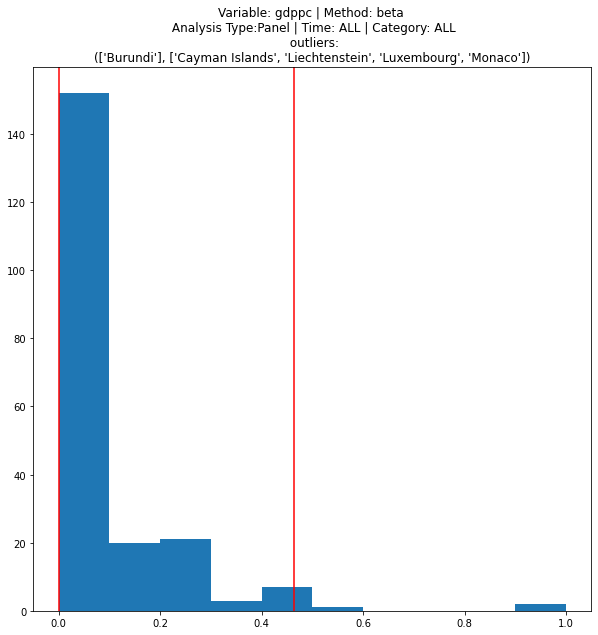

INFO - variable gdppc done.
INFO - variable Government Integrity started.


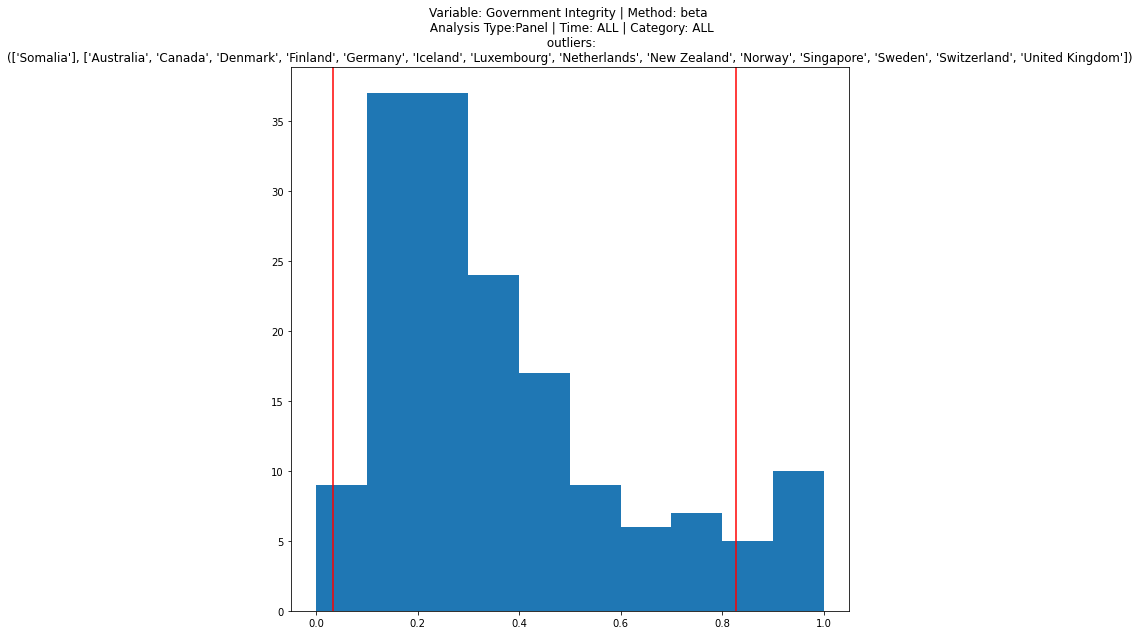

INFO - variable Government Integrity done.


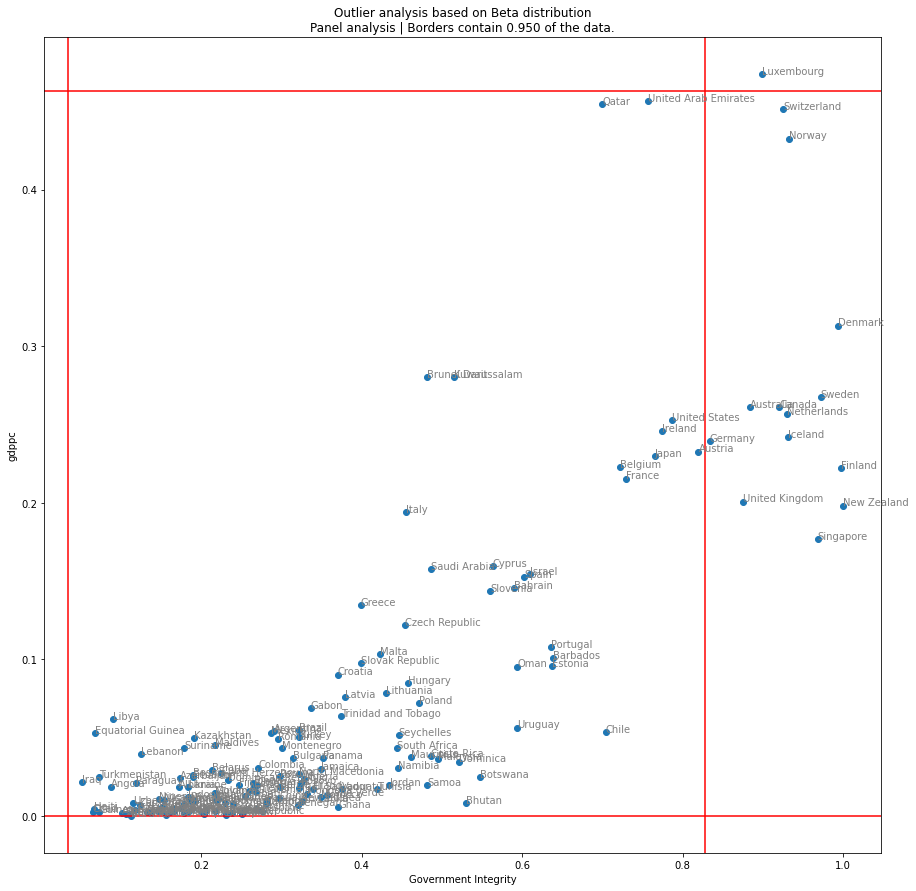

INFO - **********Outliers processed.***********


In [33]:
intervals, outliers = cpt.panel_outliers(sl=0.05,  # Significant level
                                         method='beta',  # beta, normal, IQR
                                         plot_pairs=True,
                                         plot_hists=True,
                                         plot_outliers_name=True)

In [34]:
intervals_ts, outliers_ts = cpt.time_series_outliers(sl=0.05,  # Significant level
                                                     method='beta',  # beta, normal, IQR
                                                     plot_pairs=False,
                                                     plot_hists=False,
                                                     plot_outliers_name=False)

INFO - Finding outliers for a Time_Series analysis, Method:beta
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = British Virgin Islands and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Channel Islands and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Curacao and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = French Polynesia and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Gibraltar and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Korea, Dem. People�s Rep. and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = New Caledonia and time = ALL.
ERROR - All rows are null/

In [35]:
intervals_crs, outliers_crs = cpt.cross_sectional_outliers(sl=0.05,  # Significant level
                                                           method='beta',  # beta, normal, IQR
                                                           plot_pairs=False,
                                                           plot_hists=False,
                                                           plot_outliers_name=False)

INFO - Finding outliers for a Cross_Sectional analysis, Method:beta
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = ALL and time = 2020.
INFO - variable gdppc done.
INFO - variable Government Integrity started.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1960.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1961.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1962.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1963.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1964.
ERROR - All rows are null/zero value and dropped for va

# Note
As it is shown, for some times and some categories, there are no valid data in the data set, thus, copatrec dropped them. For other, the progress was done.

# Panel Regression
To fit the non-linear equation forms, copatrec is using Machine learning techniques.
In this case, an optimization approach in thousands of iterations is used (instead of direct mathematical approaches). Thus, the sum of squared errors is the measurement of good fitting.
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = 'beta',
    plot: bool = False,
    show_category_label: bool = False,
    show_time_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] = summary object of the optimal equation format
All_Forms_Dict[independent var] = dictionary[equation forms] = summary object
All_Forms_Dict[independent var] = dictionary[equation forms] = error if there is any.

INFO - *****Finding outliers for a Panel analysis, Method:beta*****
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.
INFO - variable gdppc done.
INFO - variable Government Integrity started.
INFO - variable Government Integrity done.
INFO - **********Outliers processed.***********
INFO - ===X: gdppc, Y: Government Integrity====
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.091


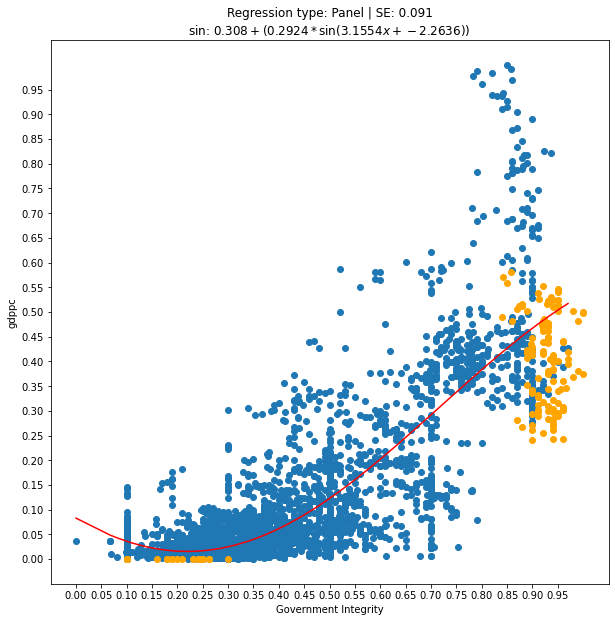

INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.094


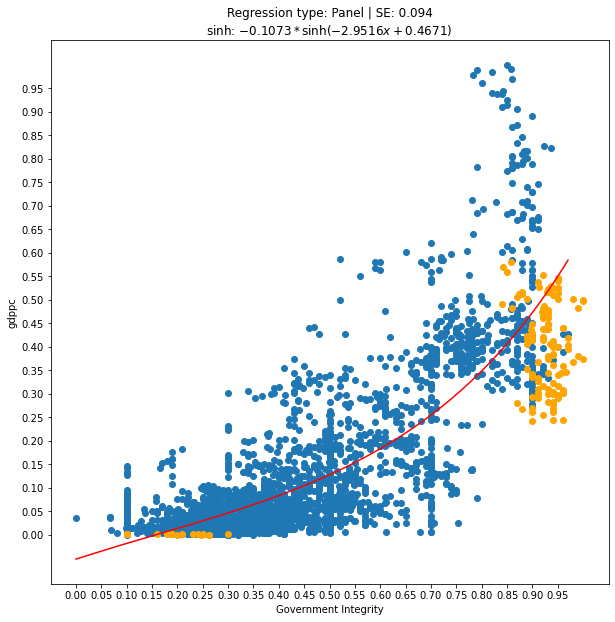

INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.091


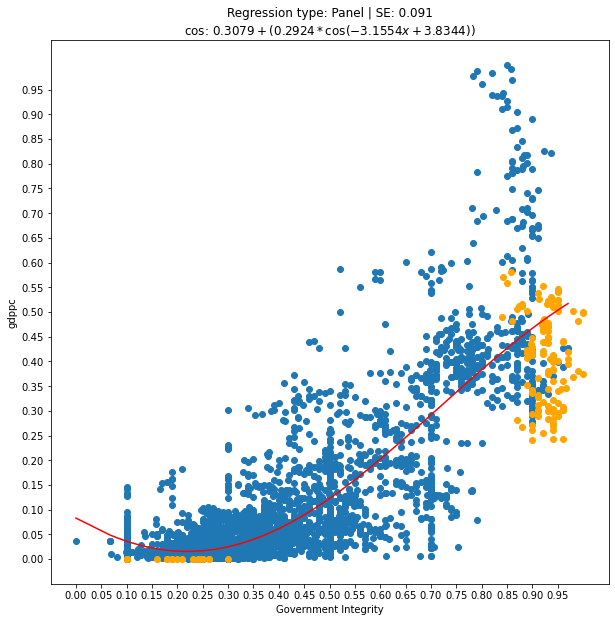

INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.096


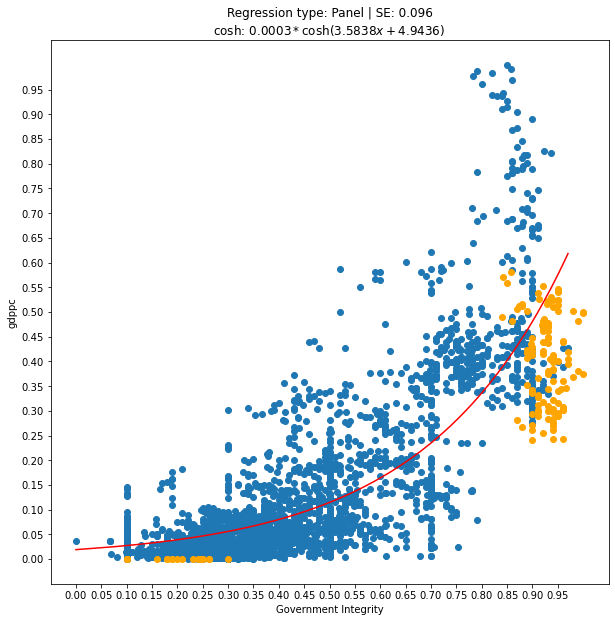

INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.168


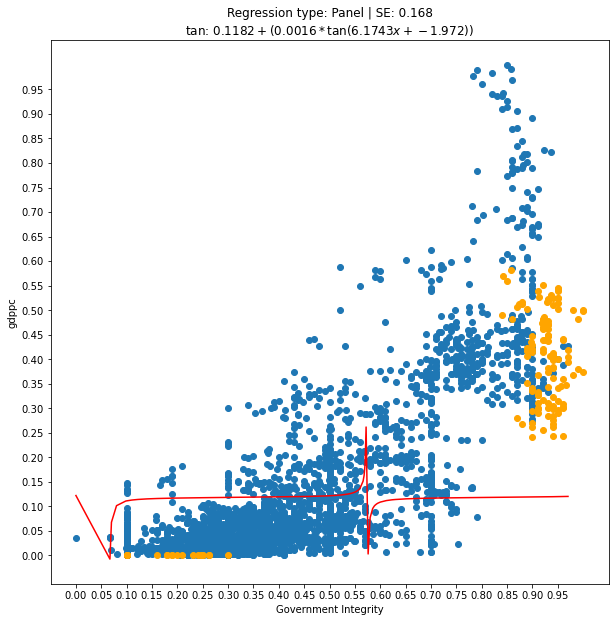

INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.101


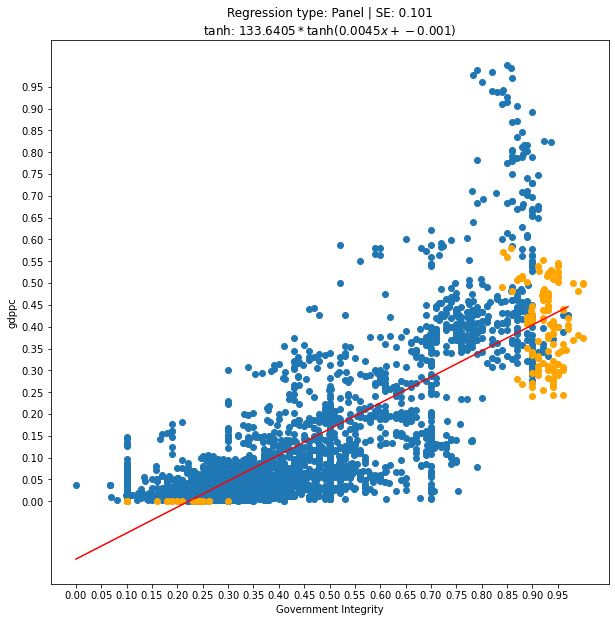

INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.128


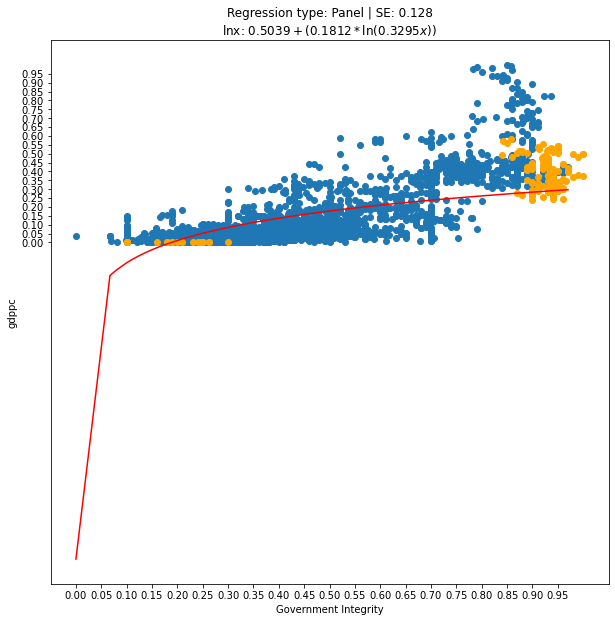

INFO - ******************logx******************
INFO - Fitted. Model SE: 0.128


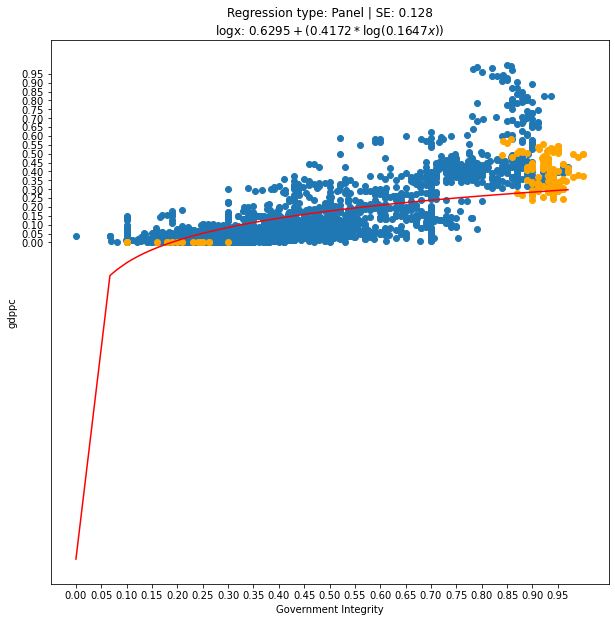

INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.093


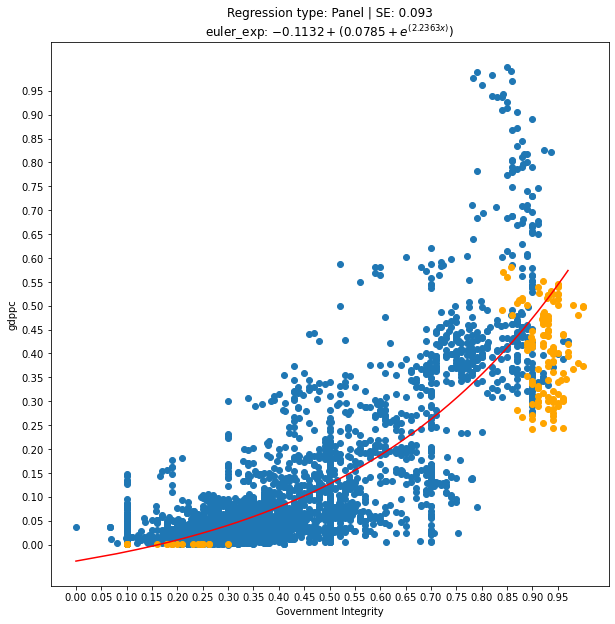

INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.093


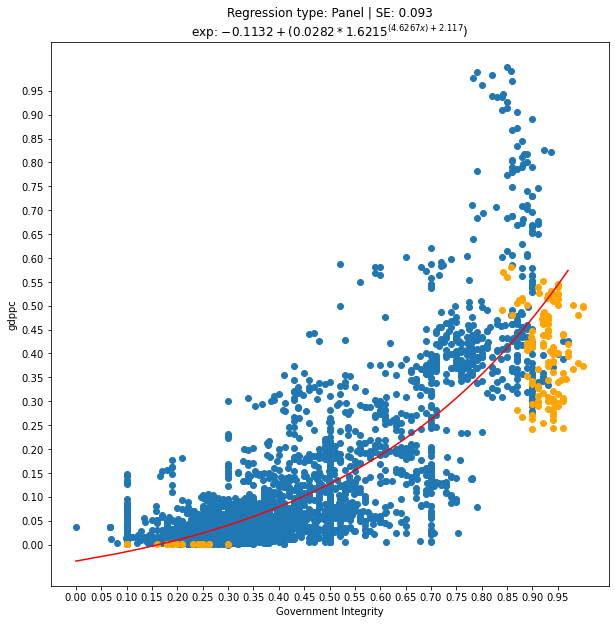

INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.09


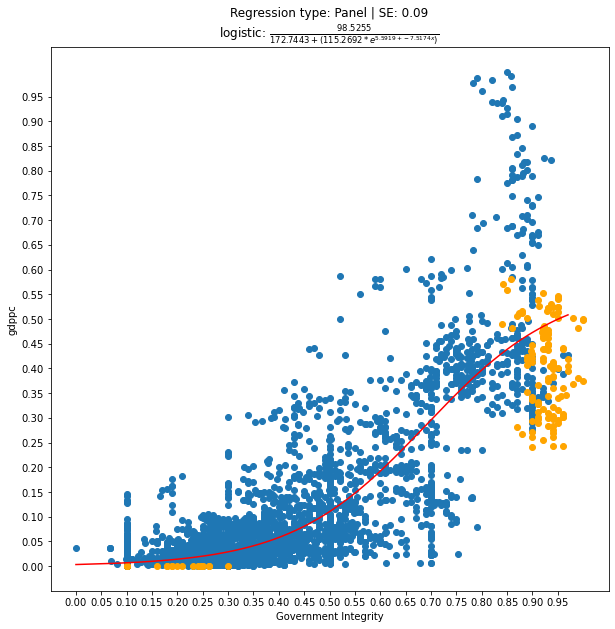

INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.092


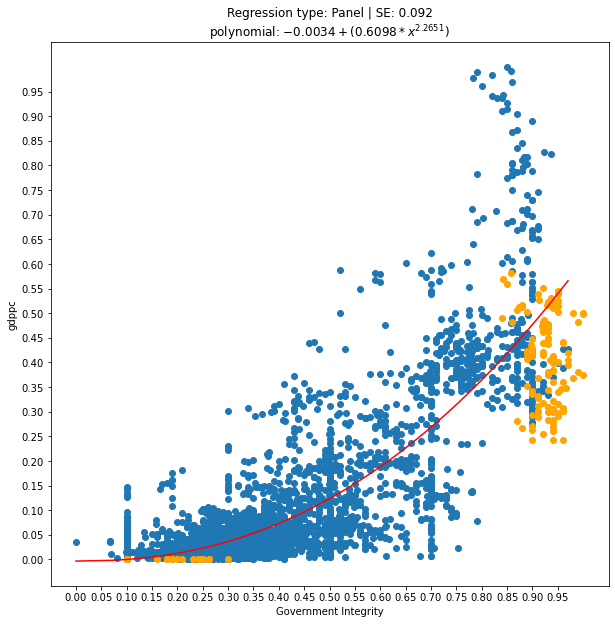

INFO - ***********oscillating_growth***********
INFO - Fitted. Model SE: 0.086


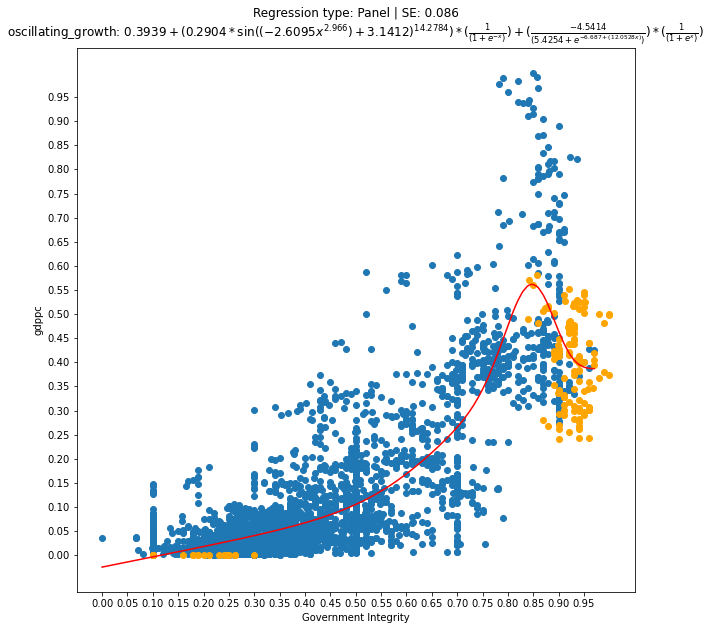

INFO - ************double_gaussian*************
INFO - Fitted. Model SE: 0.091


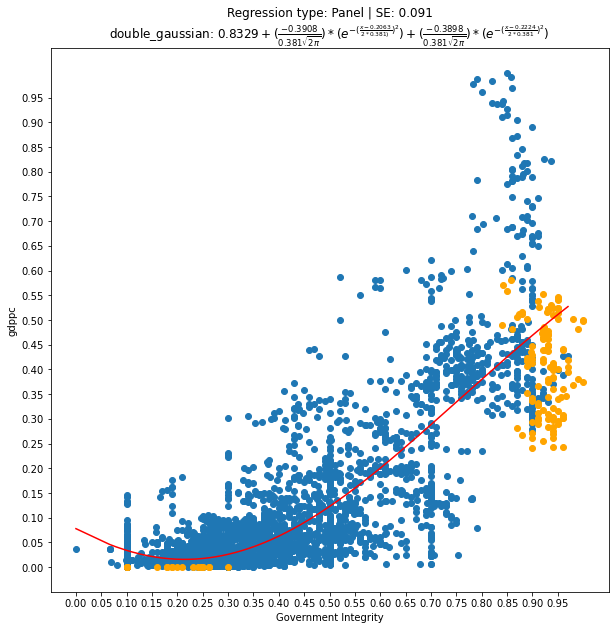

In [36]:
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.panel(standardization=True,
                                                           drop_outliers=True,
                                                           plot=True,
                                                           show_outliers=True,
                                                           plot_predicted_outliers=True)

In [41]:
Opt_Forms_Dict['Government Integrity'].report()

################################################################################
                               Regression Summary                               
Data Type:                      Panel      Equation:          oscillating_growth
Dep.Var                         gdppc      Independent.Var: Government Integrity
Time:                             ALL      Categories:                       ALL
Observations:                    3578      Deg.Freedom:                     3568
Standardized:                    True      Significance Level:              0.05
Note 1: Copatrec aims to analyze complex behaviors. Complex functions can genera
te their unique curve or create a snapshot of a specific range. Thus, it would b
e beneficial to compare the curve with the already known complex behaviors. For 
example, the logistic function is representative of S-shaped behavior. However, 
all other tasks like oscillator or sine can generate S-shape behavior in a speci
fic range. So, while the equ

INFO - ===X: gdppc, Y: Government Integrity====
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.091


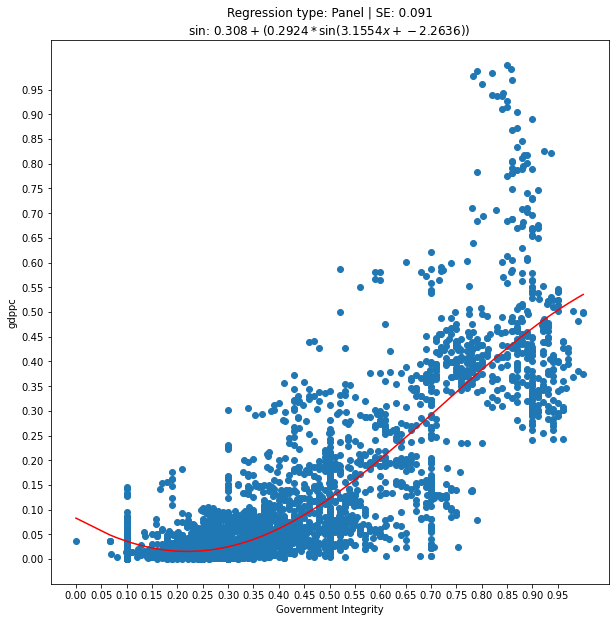

INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.094


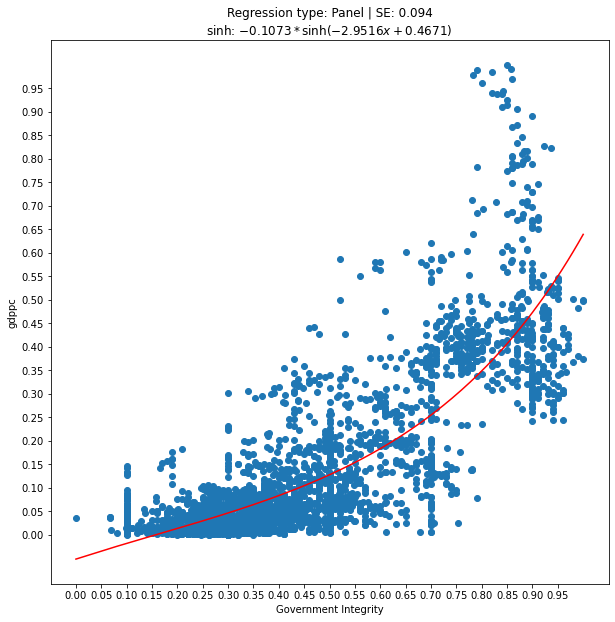

INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.091


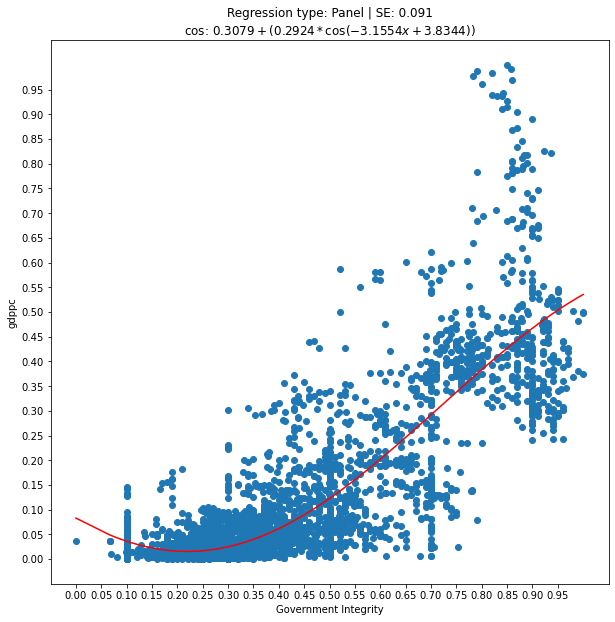

INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.096


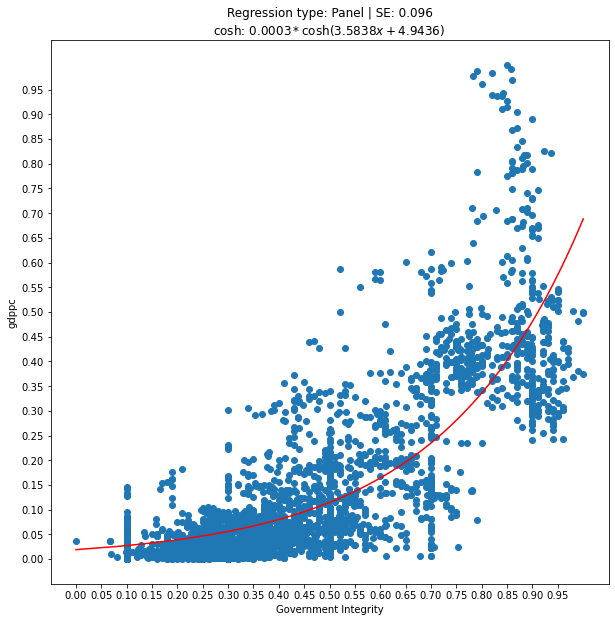

INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.168


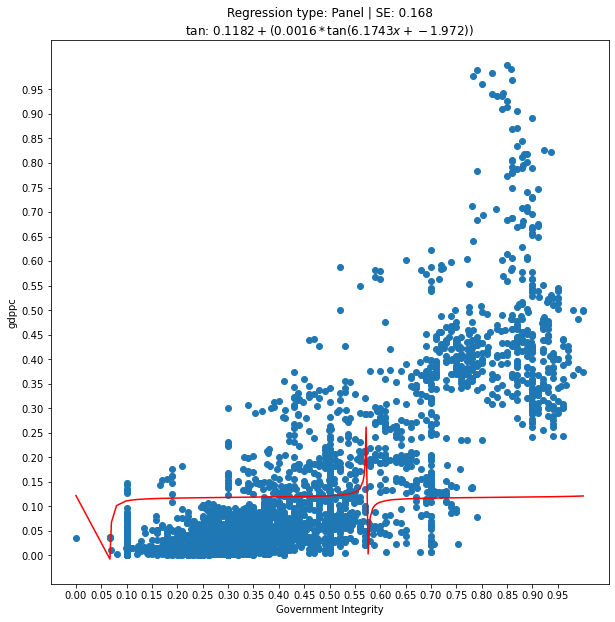

INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.101


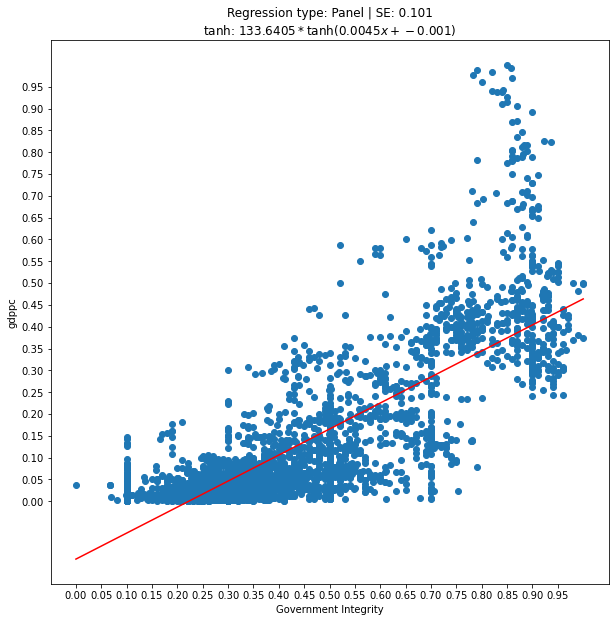

INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.128


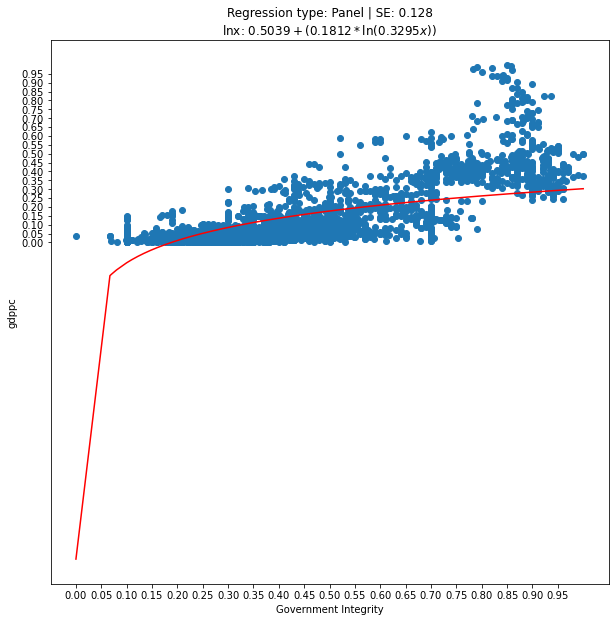

INFO - ******************logx******************
INFO - Fitted. Model SE: 0.128


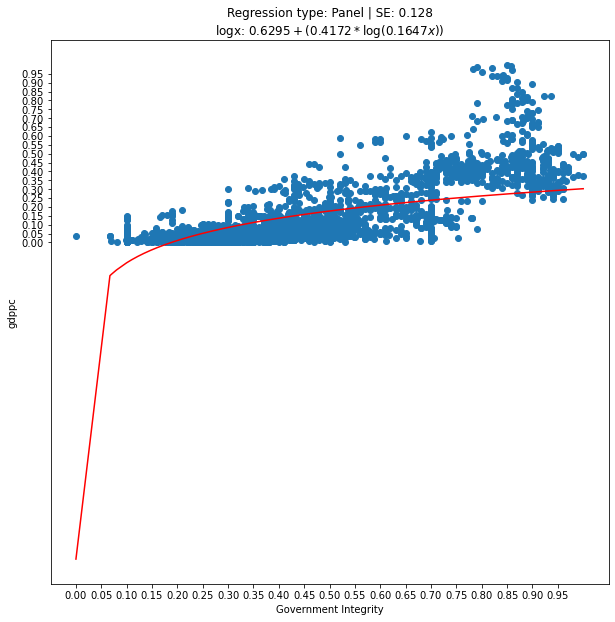

INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.093


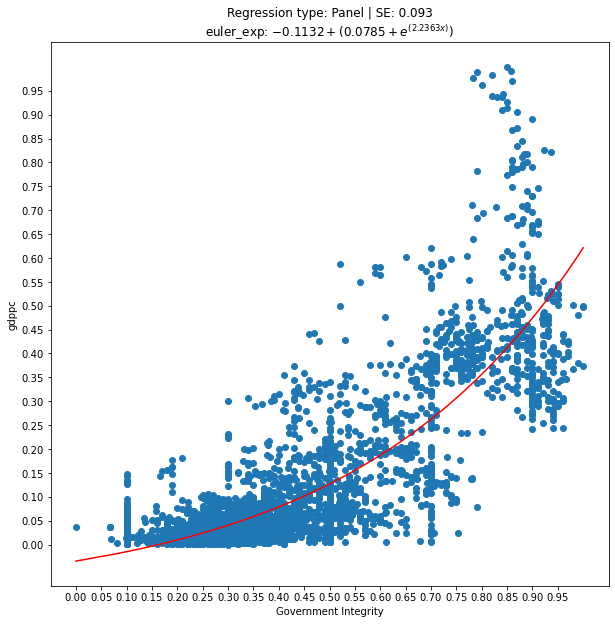

INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.093


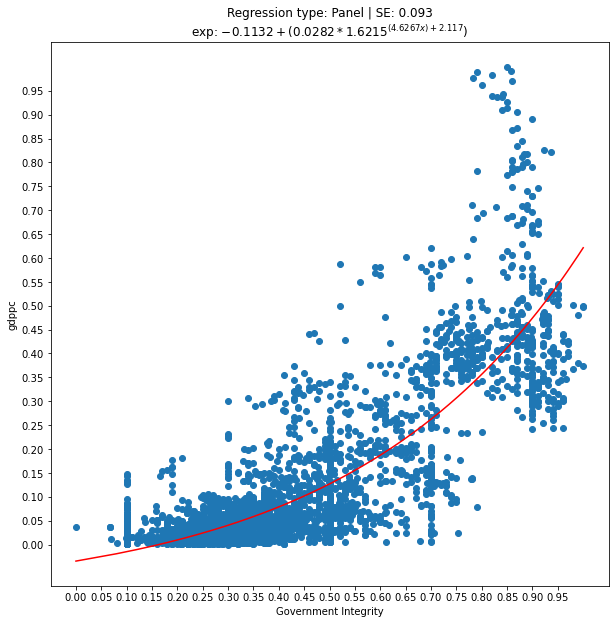

INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.09


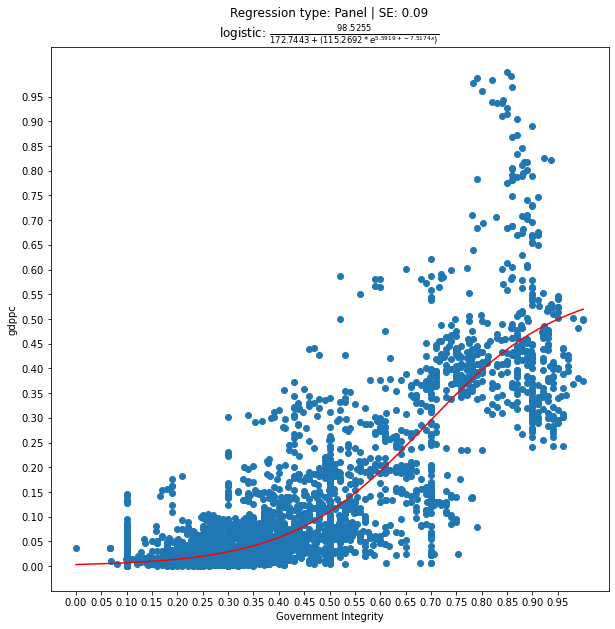

INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.092


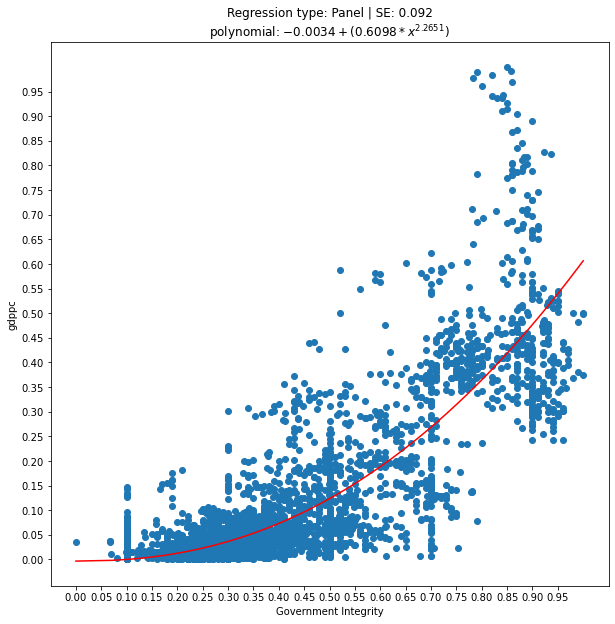

INFO - ***********oscillating_growth***********
INFO - Fitted. Model SE: 0.086


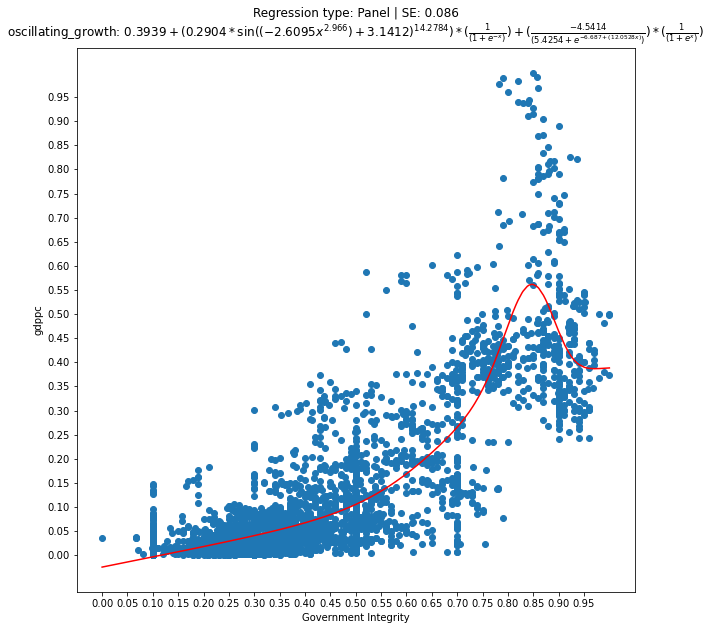

INFO - ************double_gaussian*************
INFO - Fitted. Model SE: 0.091


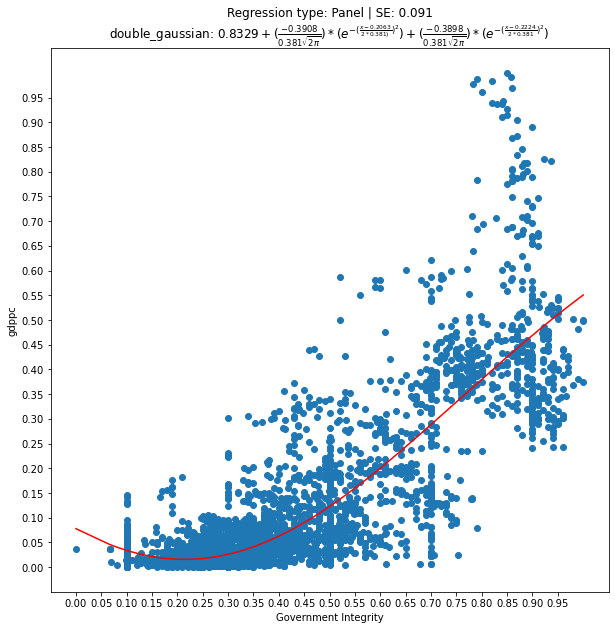

In [42]:
# Panel analysis without dropping outliers
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.panel(standardization=True,
                                                           drop_outliers=False,
                                                           plot=True,
                                                           show_outliers=True,
                                                           plot_predicted_outliers=True)

In [43]:
Opt_Forms_Dict['Government Integrity'].report()

################################################################################
                               Regression Summary                               
Data Type:                      Panel      Equation:          oscillating_growth
Dep.Var                         gdppc      Independent.Var: Government Integrity
Time:                             ALL      Categories:                       ALL
Observations:                    3578      Deg.Freedom:                     3568
Standardized:                    True      Significance Level:              0.05
Note 1: Copatrec aims to analyze complex behaviors. Complex functions can genera
te their unique curve or create a snapshot of a specific range. Thus, it would b
e beneficial to compare the curve with the already known complex behaviors. For 
example, the logistic function is representative of S-shaped behavior. However, 
all other tasks like oscillator or sine can generate S-shape behavior in a speci
fic range. So, while the equ

# Report Result
In this particular data set, and in the panel mode, outliers do not play a role in the regression model. So, the fitted parameters are same for both before and after dropping outliers. And following that, all analysis are similar.

# Time series Regression
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = CST.Beta_Method,
    plot: bool = False,
    plot_only_best: bool = True,
    show_time_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] => dictionary[categories] => summary object of the optimal equation format
All_Forms_Dict[independent var] => dictionary[categories] => dictionary[equation forms] => summary object
All_Forms_Dict[independent var] => dictionary[categories]=> dictionary[equation forms] => error if there is any.

INFO - Finding outliers for a Time_Series analysis, Method:beta
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = British Virgin Islands and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Channel Islands and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Curacao and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = French Polynesia and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Gibraltar and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = Korea, Dem. People�s Rep. and time = ALL.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = New Caledonia and time = ALL.
ERROR - All rows are null/

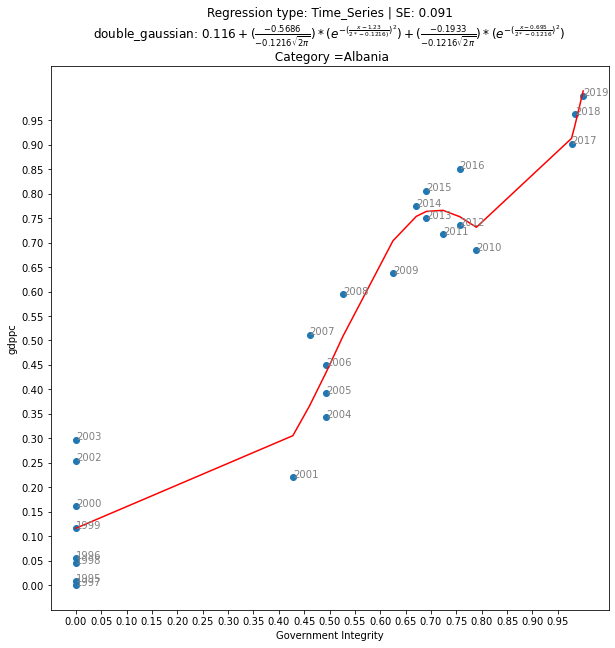

INFO - ------------Category:Algeria------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.144
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.189
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.144
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.211
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.142
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.152
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.333
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.333
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.189
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

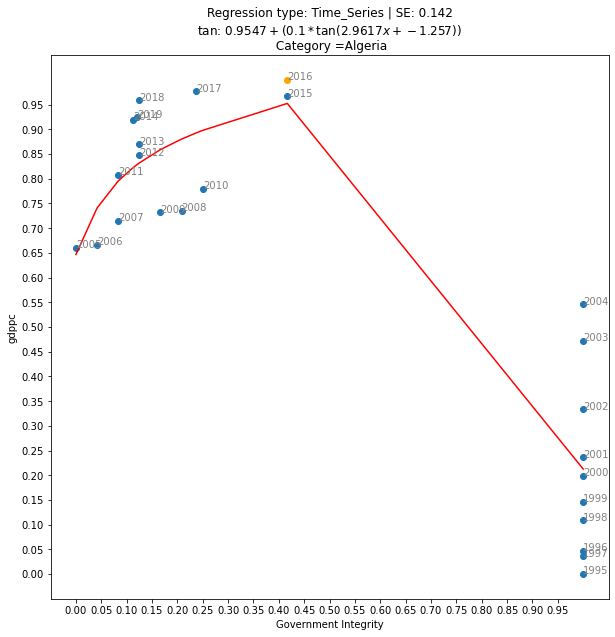

INFO - --------Category:American Samoa---------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Andorra------------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Angola-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.141
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.334
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.141
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.35
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.222
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.224
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.234
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.2

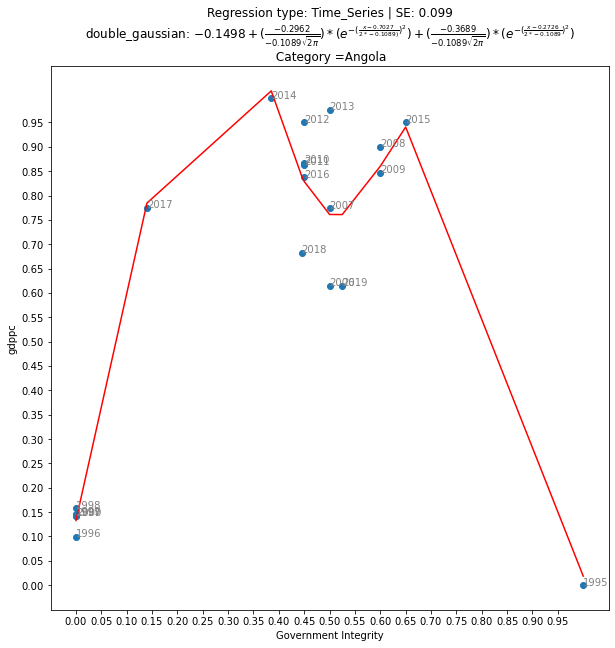

INFO - ------Category:Antigua and Barbuda------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -----------Category:Argentina-----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.302
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.3
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.302
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.3
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.307
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.3
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.318
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.318
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.3
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.314
INFO - *

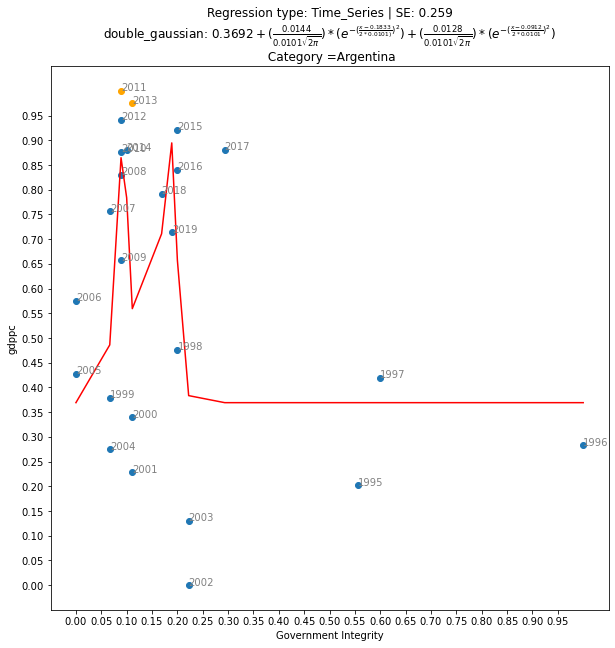

INFO - ------------Category:Armenia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.265
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.328
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.265
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.329
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.311
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.324
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.321
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.321
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.328
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.341
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.34
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.321
INFO 

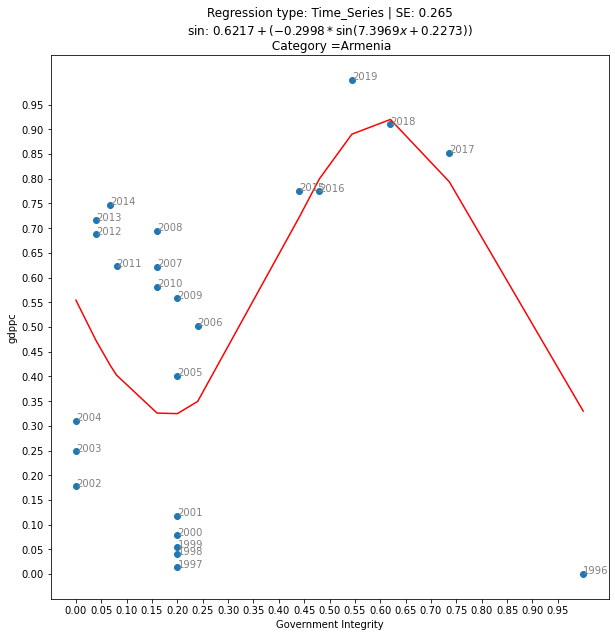

INFO - -------------Category:Aruba-------------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -----------Category:Australia-----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.258
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.32
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.258
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.321
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.262
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.269
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.279
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.279
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.32
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in

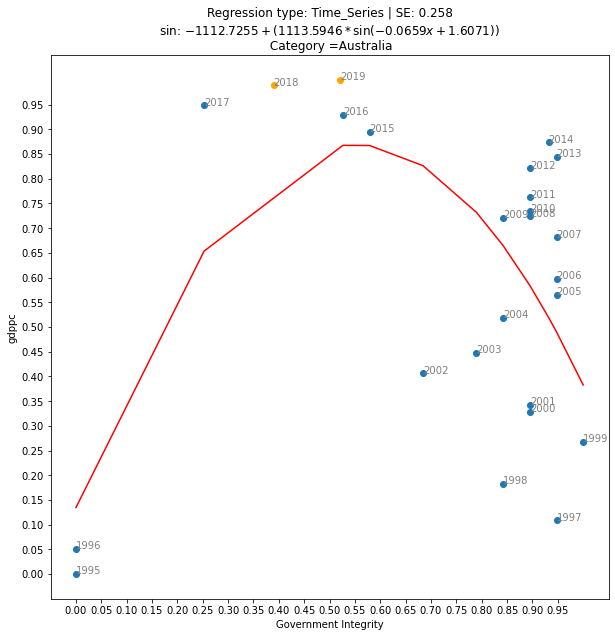

INFO - ------------Category:Austria------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.283
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.294
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.283
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.296
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.305
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.245
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.3
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.3
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.294
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. 

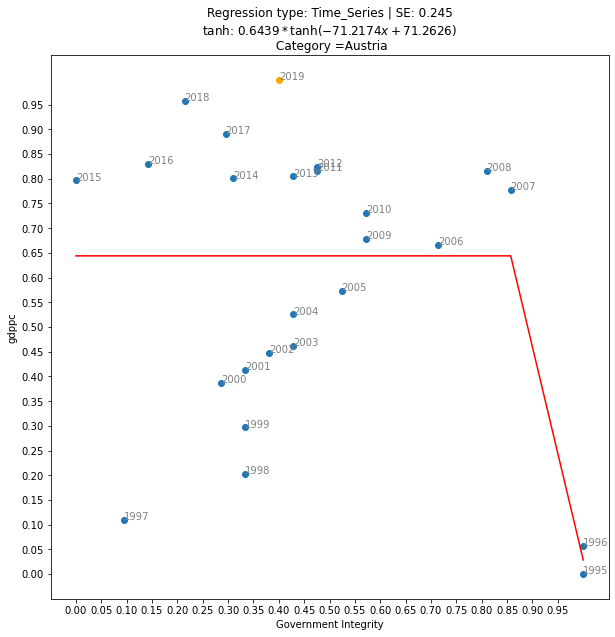

INFO - ----------Category:Azerbaijan-----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.378
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.381
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.378
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.388
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.296
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.358
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.376
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.376
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.381
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

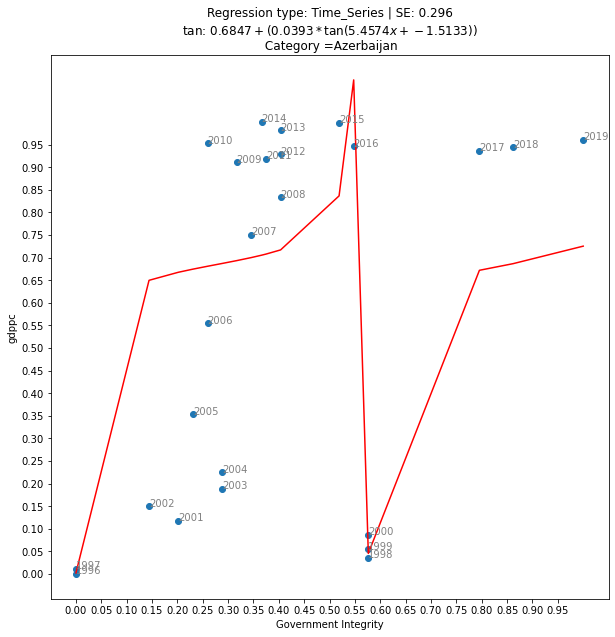

INFO - ---------Category:Bahamas, The----------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Bahrain------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.21
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.234
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.21
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.228
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.275
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.236
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.283
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.283
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.236
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.242
IN

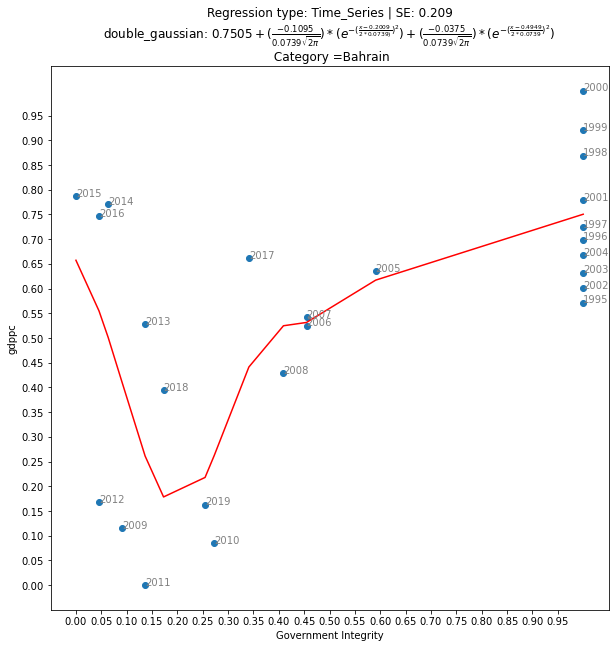

INFO - ----------Category:Bangladesh-----------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -----------Category:Barbados------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.219
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.226
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.219
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.228
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.209
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.222
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.214
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.214
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.226
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.234


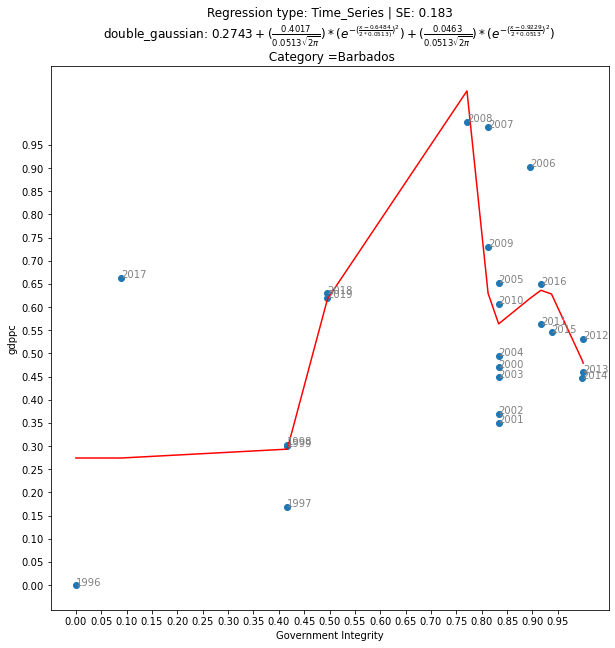

INFO - ------------Category:Belarus------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.265
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.374
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.265
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.379
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.271
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.282
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.294
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.294
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.374
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

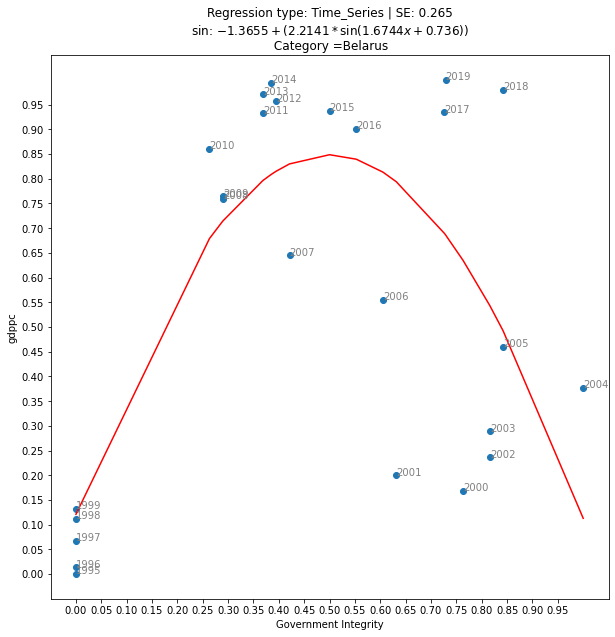

INFO - ------------Category:Belgium------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.193
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.283
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.193
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.286
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.283
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.265
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.274
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.274
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.283
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.28
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.277
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.272
INFO 

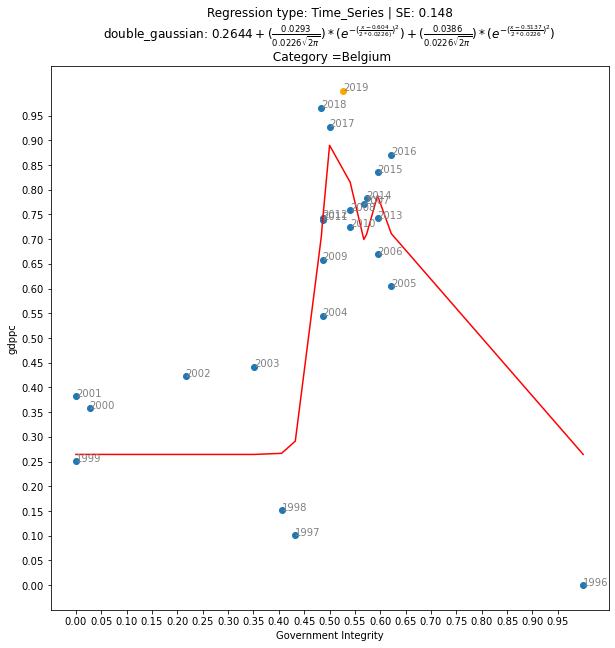

INFO - ------------Category:Belize-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.264
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.3
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.264
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.309
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.241
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.237
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.346
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.346
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.3
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. 

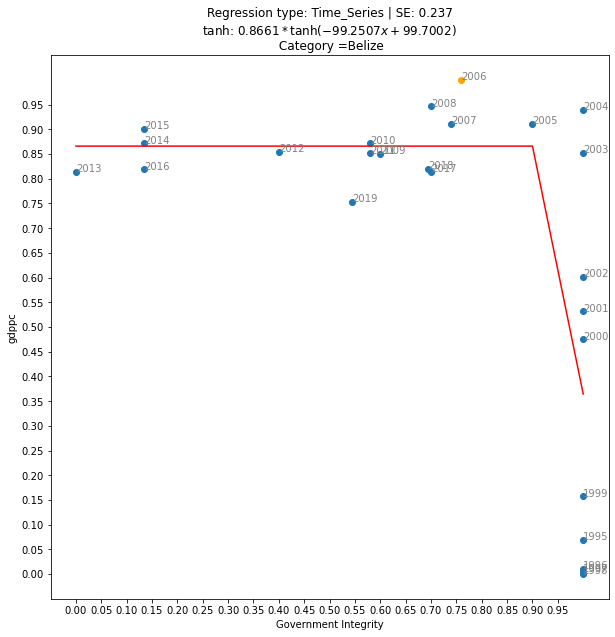

INFO - -------------Category:Benin-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.233
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.239
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.233
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.244
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.223
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.223
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.267
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.267
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.239
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

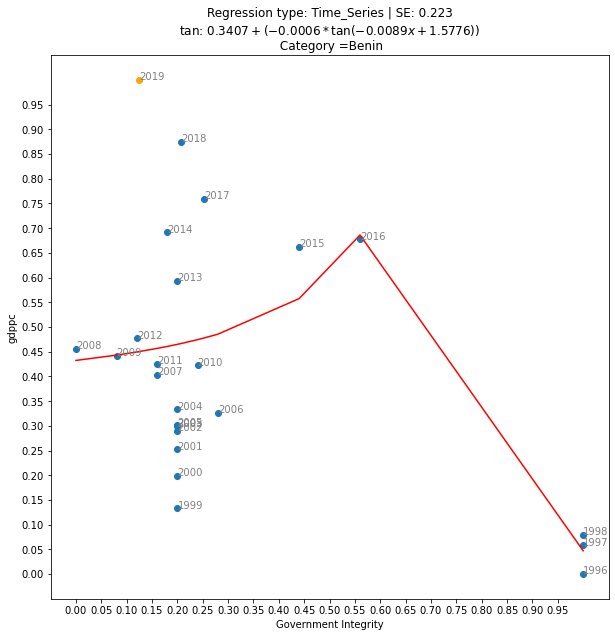

INFO - ------------Category:Bermuda------------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Bhutan-------------
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Bolivia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.336
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.328
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.336
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.328
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.333
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.329
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.333
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.333
INFO - ***************euler_exp**********

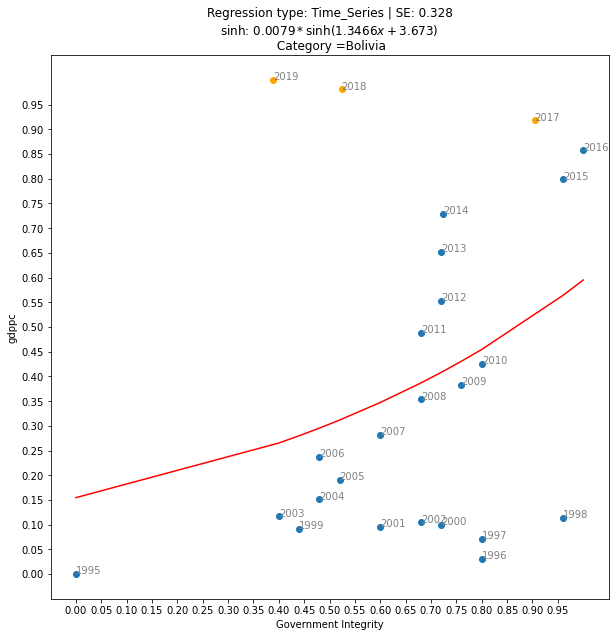

INFO - ----Category:Bosnia and Herzegovina-----
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.173
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.173
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.173
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.19
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.171
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.168
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.168
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.168
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.173
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

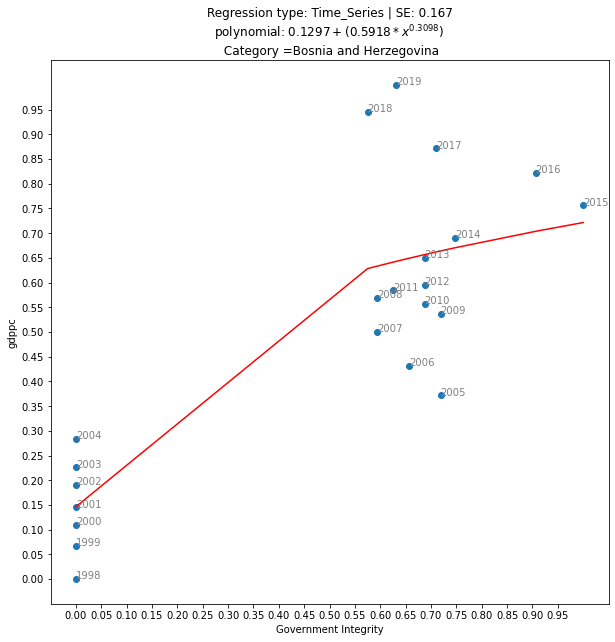

INFO - -----------Category:Botswana------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.307
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.333
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.307
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.337
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.269
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.328
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.329
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.329
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.333
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

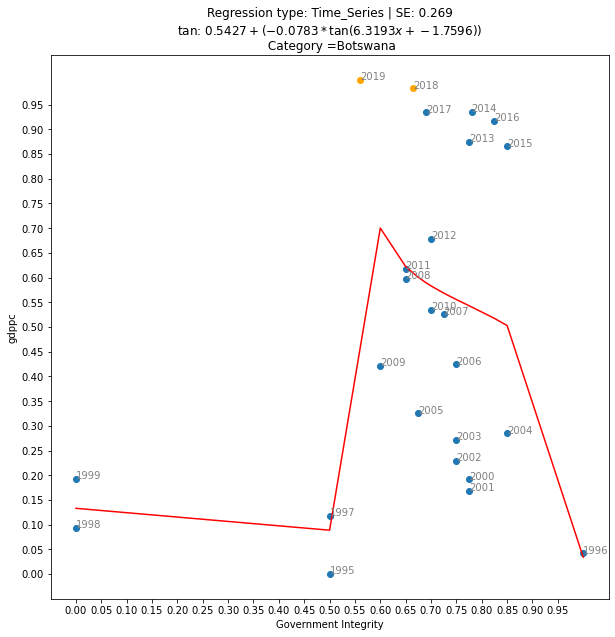

INFO - ------------Category:Brazil-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.359
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.377
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.359
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.377
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.36
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.365
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.371
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.371
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.377
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.383
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.396
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.368
INFO 

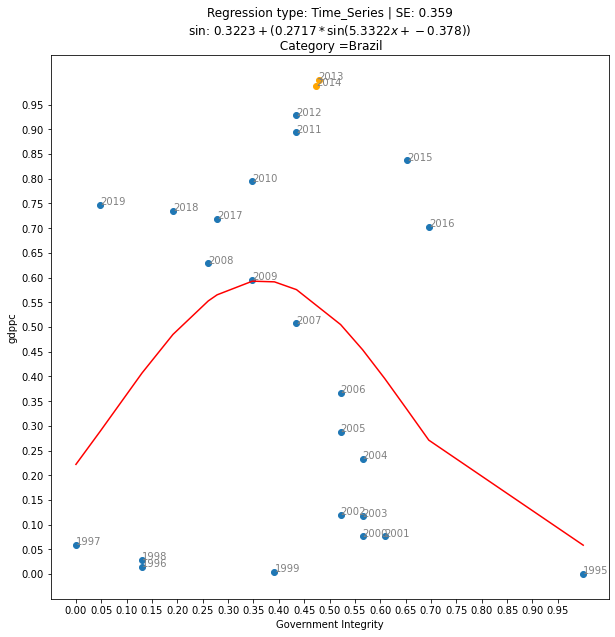

INFO - ----Category:British Virgin Islands-----
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -------Category:Brunei Darussalam-------
ERROR - Analysis error: The number of observations are less than 10.
INFO - -----------Category:Bulgaria------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.244
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.25
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.244
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.262
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.291
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.232
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.283
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.283
INFO - ***************euler_exp***********

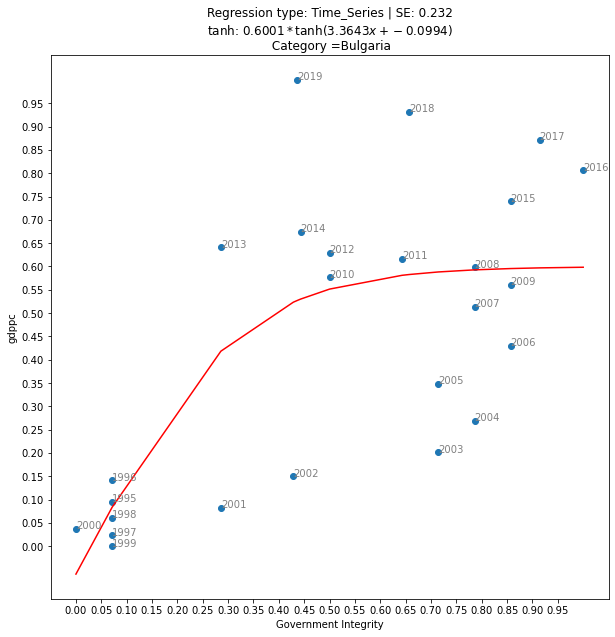

INFO - ---------Category:Burkina Faso----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.19
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.189
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.19
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.189
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.187
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.195
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.217
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.217
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.188
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.198
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.198
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.188
INFO -

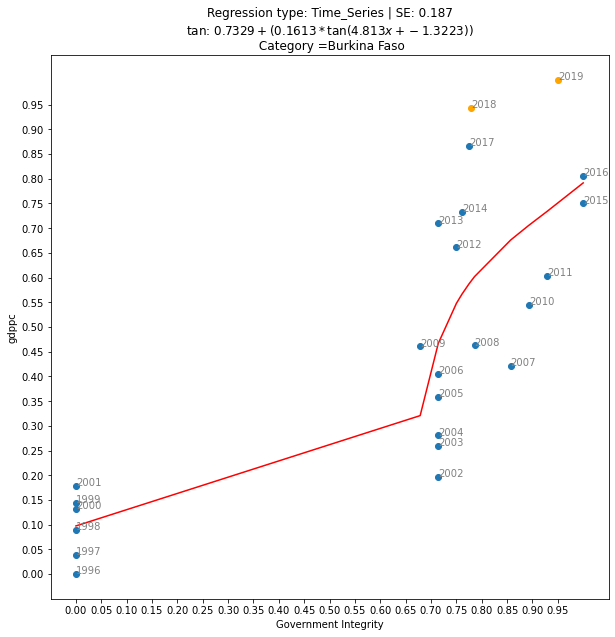

INFO - ------------Category:Burundi------------
INFO - ******************sin*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.188
INFO - ******************sinh******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.242
INFO - ******************cos*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.188
INFO - ******************cosh*****

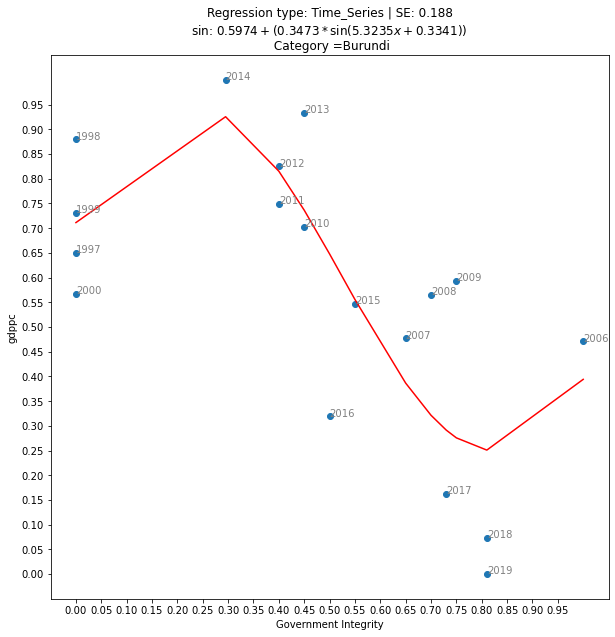

INFO - ----------Category:Cabo Verde-----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.172
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.209
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.172
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.224
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.162
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.164
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.166
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.166
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.209
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

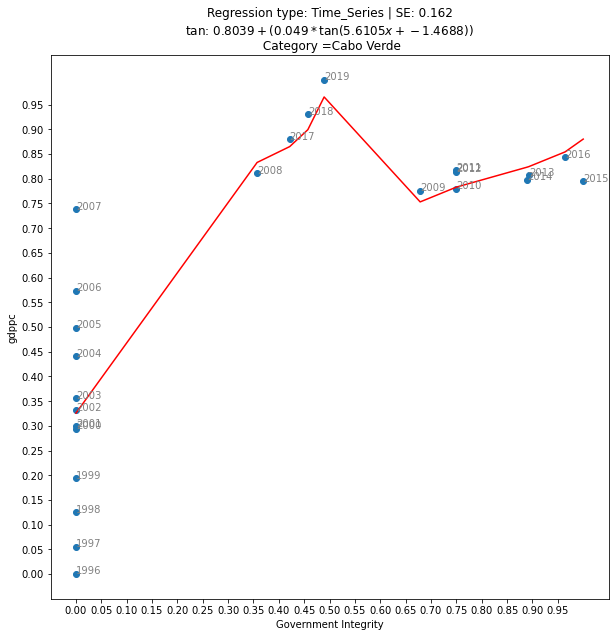

INFO - -----------Category:Cambodia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.145
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.201
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.145
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.237
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.286
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.17
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.319
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.319
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.201
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

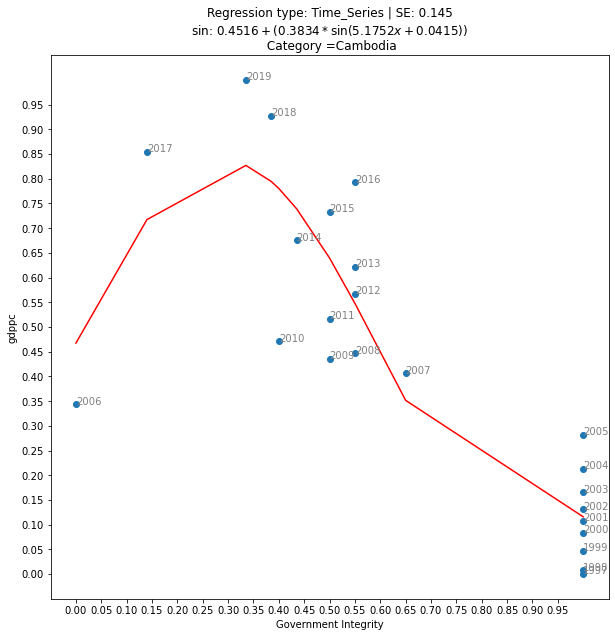

INFO - -----------Category:Cameroon------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.244
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.239
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.244
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.244
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.247
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.239
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.253
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.253
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.239
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

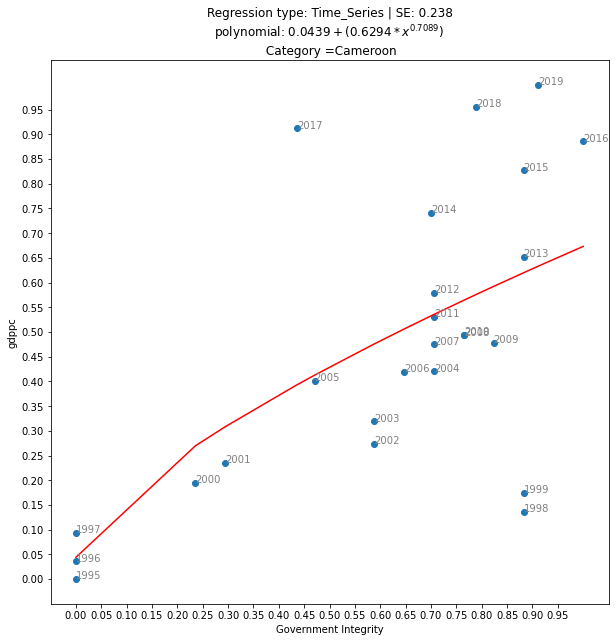

INFO - ------------Category:Canada-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.209
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.225
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.209
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.248
INFO - ******************tan*******************
ERROR - <class 'RuntimeError'> in function tan 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.21
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.328
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.328
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.213
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of ca

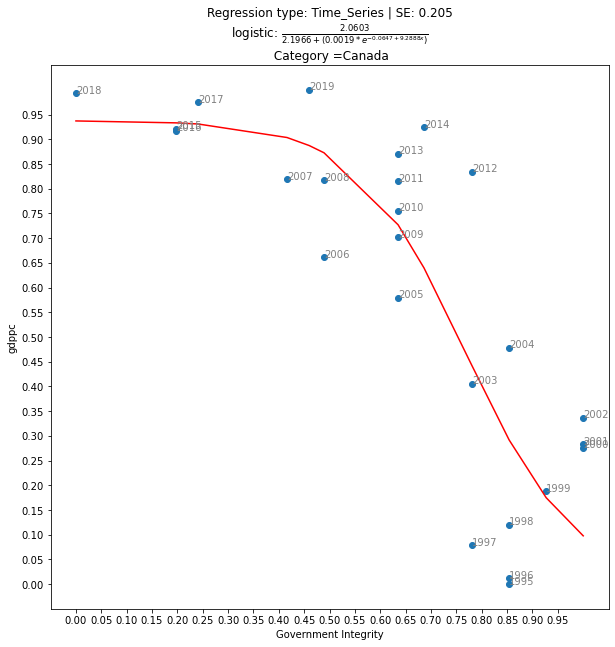

INFO - --------Category:Cayman Islands---------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ---Category:Central African Republic----
INFO - ******************sin*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.258
INFO - ******************sinh******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.309
INFO - ******************cos*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 

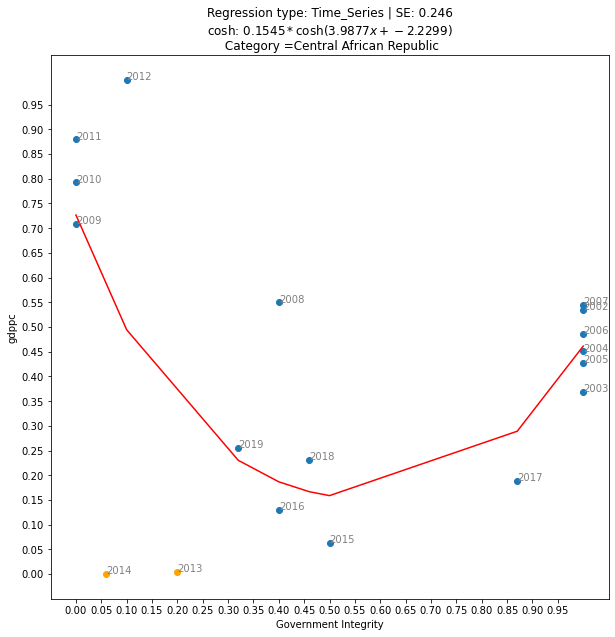

INFO - -------------Category:Chad--------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.194
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.253
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.194
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.278
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.189
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.19
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.193
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.193
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.253
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

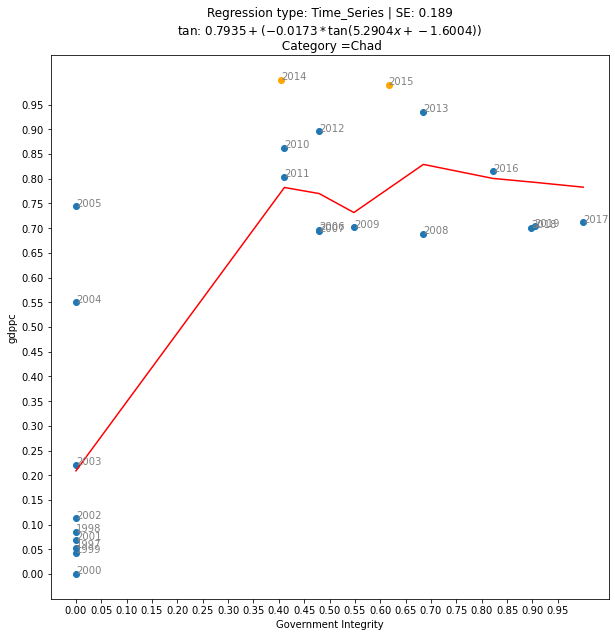

INFO - --------Category:Channel Islands--------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -------------Category:Chile-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.304
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.342
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.304
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.346
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.293
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.314
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.317
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.317
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.342
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> 

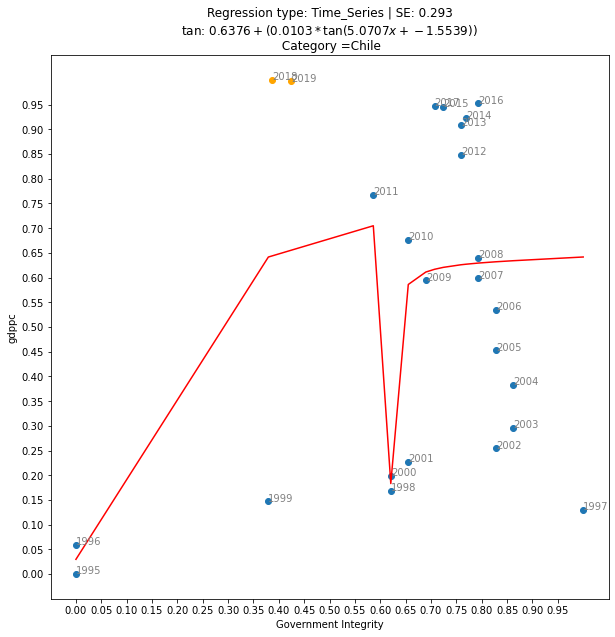

INFO - -------------Category:China-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.168
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.191
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.168
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.21
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.318
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.191
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.312
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.312
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.189
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

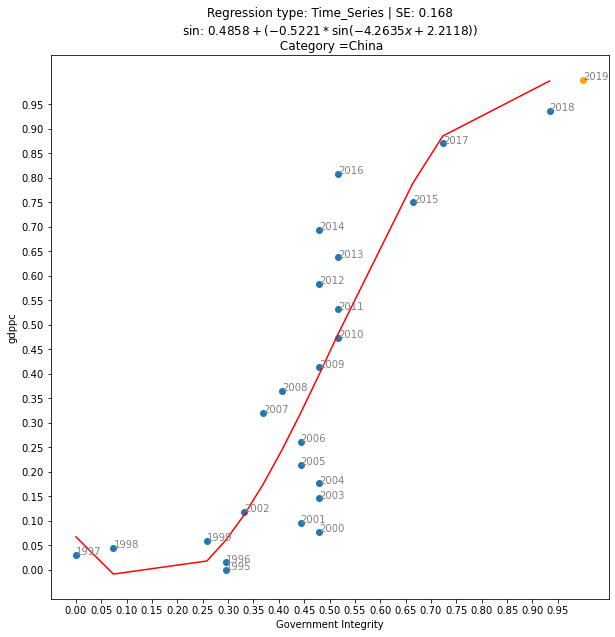

INFO - -----------Category:Colombia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.321
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.336
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.321
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.338
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.364
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.336
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.36
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.36
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.335
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.352
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.301
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.334
INFO -

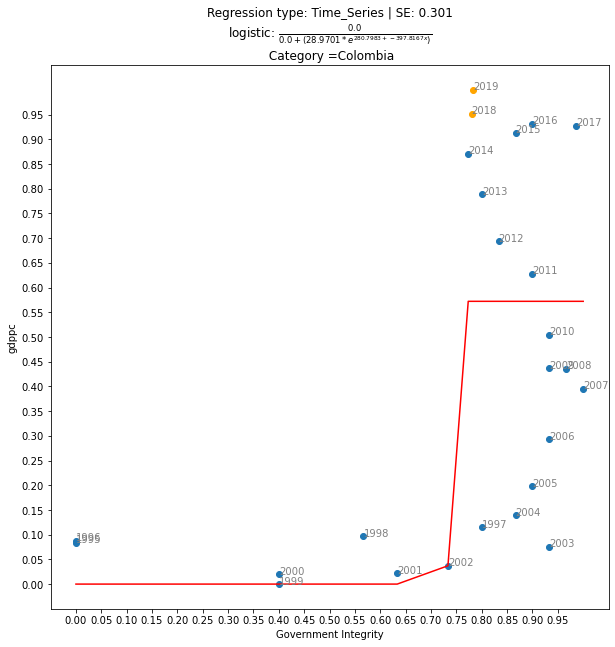

INFO - ------------Category:Comoros------------
INFO - ******************sin*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.356
INFO - ******************sinh******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.338
INFO - ******************cos*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.356
INFO - ******************cosh*****

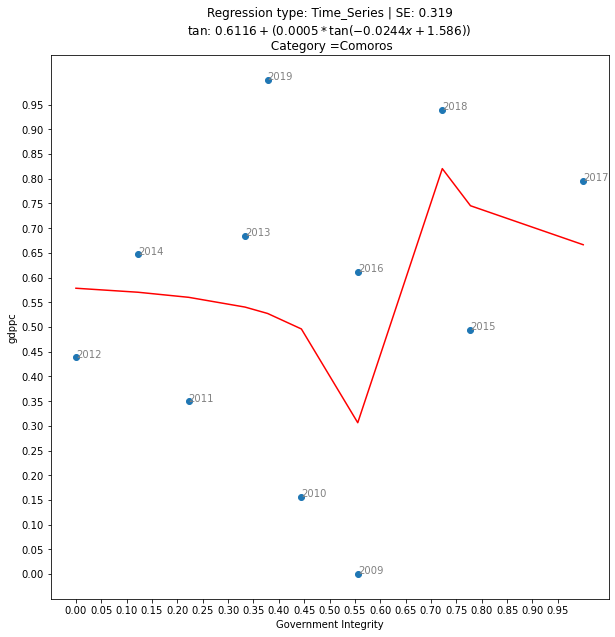

INFO - -------Category:Congo, Dem. Rep.--------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ----------Category:Congo, Rep.----------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ----------Category:Costa Rica-----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.301
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.342
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.301
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.342
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.329
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.34
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.343
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.3

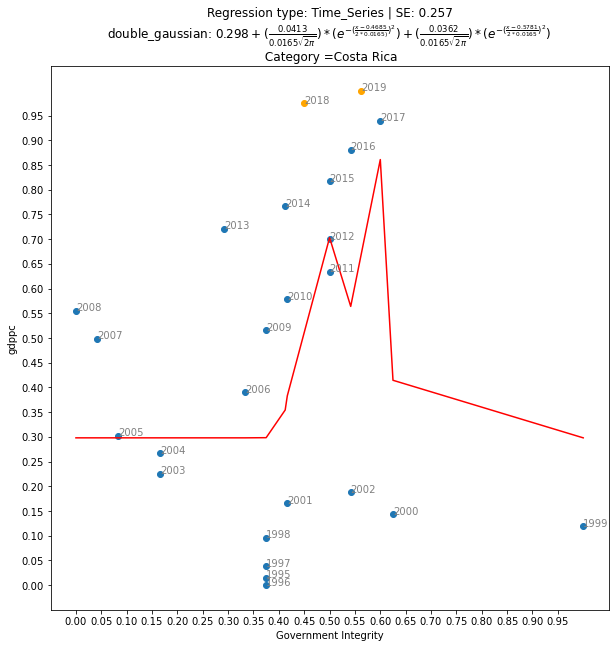

INFO - ---------Category:Cote d'Ivoire---------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Croatia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.217
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.292
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.217
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.293
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.29
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.219
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.292
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.292
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.292
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.23
IN

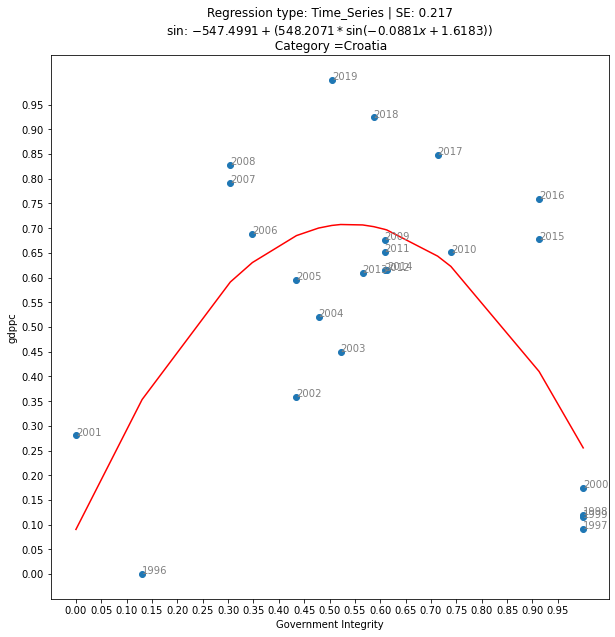

INFO - -------------Category:Cuba--------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.148
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.155
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.148
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.174
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.152
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.149
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.149
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.149
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.155
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitt

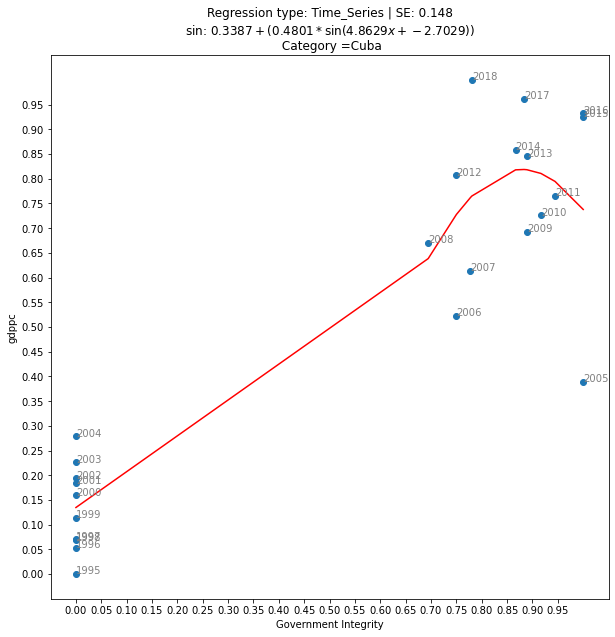

INFO - ------------Category:Curacao------------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Cyprus-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.195
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.303
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.195
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.303
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.297
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.303
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.301
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.301
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.303
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.319


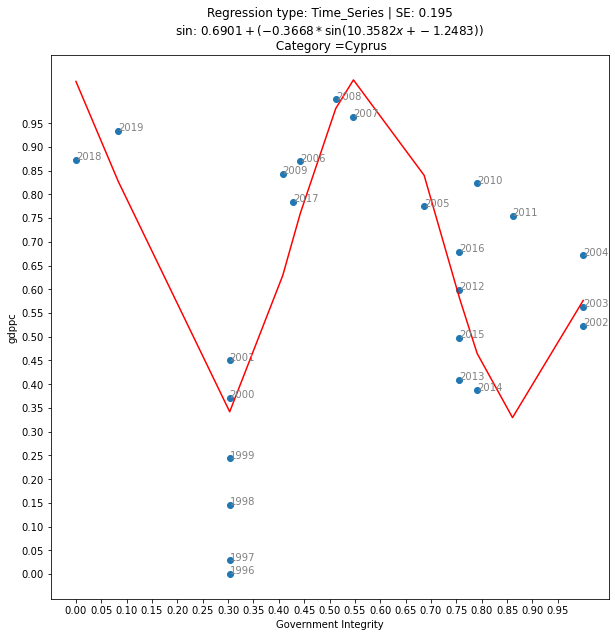

INFO - --------Category:Czech Republic---------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.332
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.325
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.332
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.324
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.321
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.325
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.326
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.326
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.325
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.34
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.34
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.325
INFO -

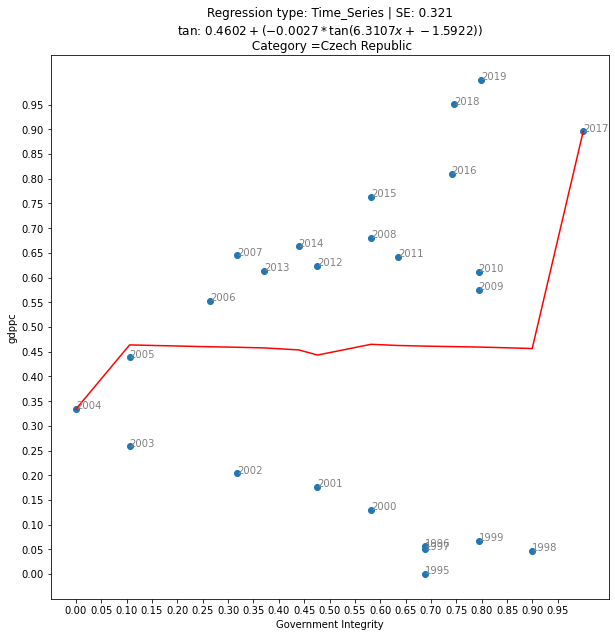

INFO - ------------Category:Denmark------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.227
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.223
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.227
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.221
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.25
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.226
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.234
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.234
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.226
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

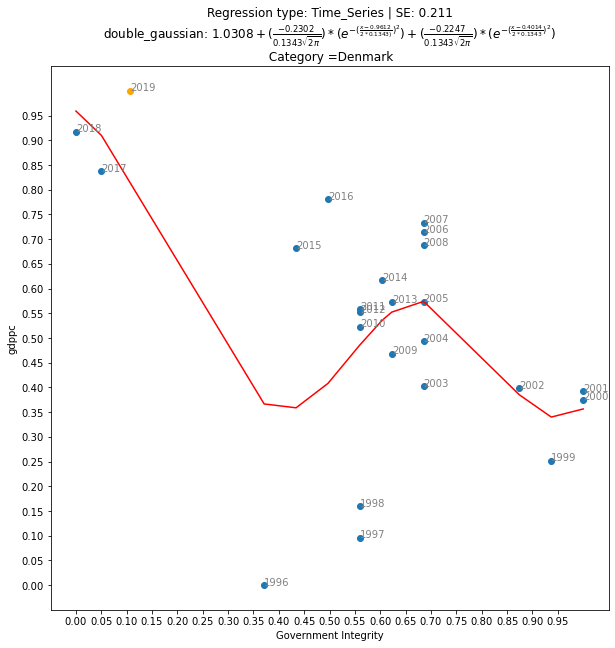

INFO - -----------Category:Djibouti------------
ERROR - Analysis error: The number of observations are less than 10.
INFO - -----------Category:Dominica------------
INFO - ******************sin*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.17
INFO - ******************sinh******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "

INFO - Fitted. Model SE: 0.214
INFO - ******************cos*******************
WARNING - C:\Users\siamakkh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("k

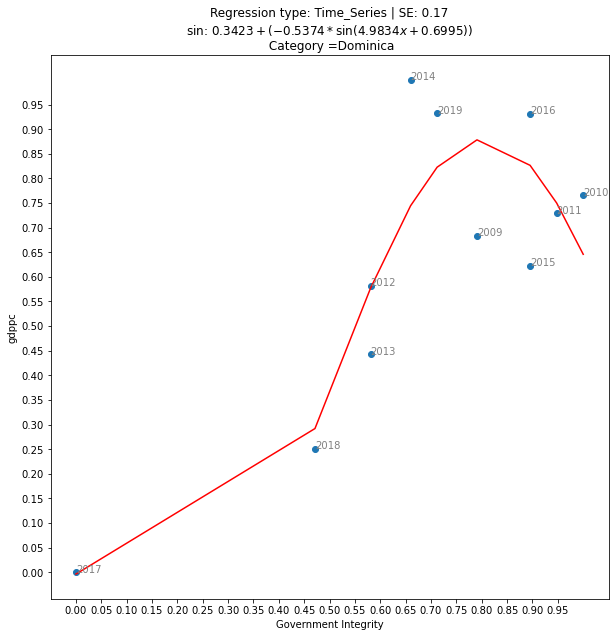

INFO - ------Category:Dominican Republic-------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.253
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.25
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.253
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.248
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.235
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.261
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.267
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.267
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.261
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitte

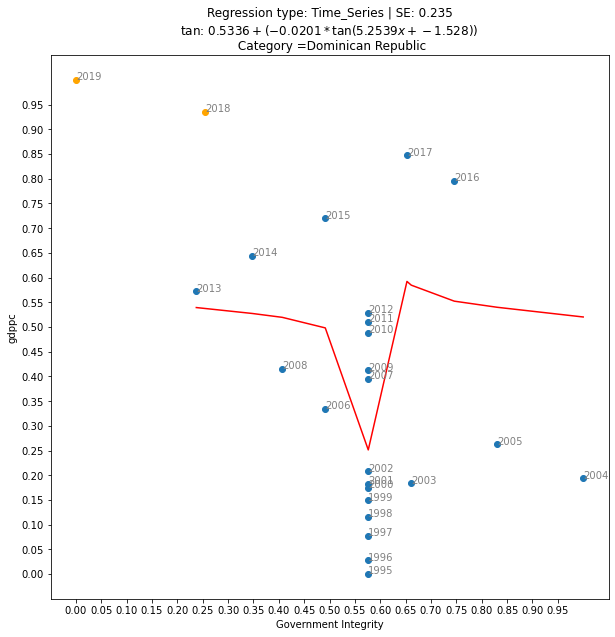

INFO - ------------Category:Ecuador------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.359
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.351
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.359
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.351
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.344
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.351
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.357
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.357
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.351
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.368
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.368
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.351
INFO

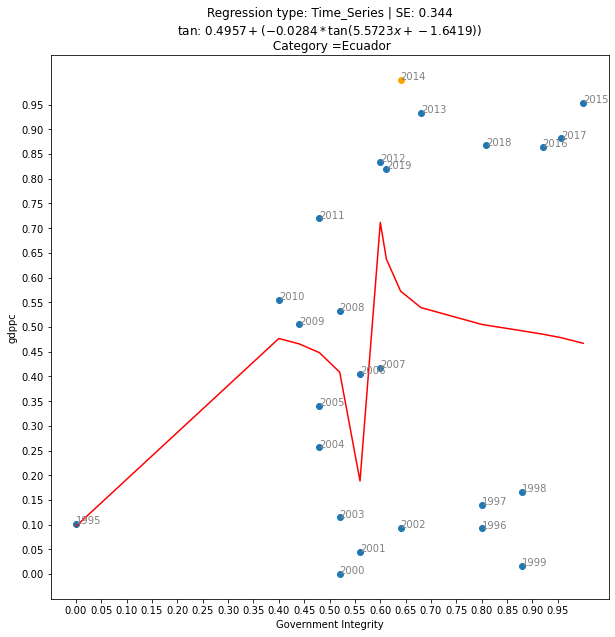

INFO - -------Category:Egypt, Arab Rep.--------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ----------Category:El Salvador----------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.207
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.202
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.207
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.21
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.242
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.204
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.272
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.272
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.204
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.212
I

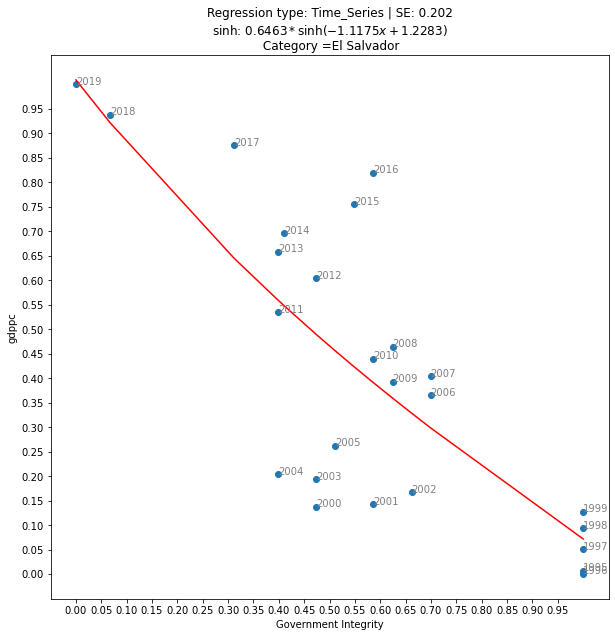

INFO - -------Category:Equatorial Guinea-------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.23
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.285
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.23
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.29
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.233
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.265
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.266
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.266
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.285
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted.

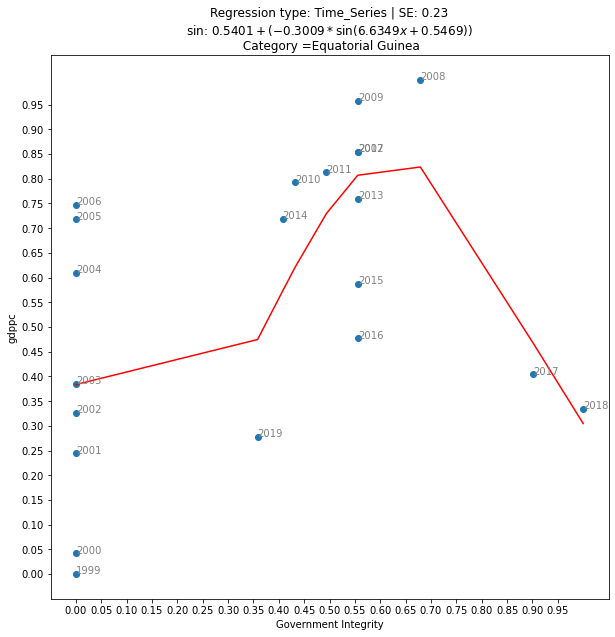

INFO - ------------Category:Eritrea------------
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Estonia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.222
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.222
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.222
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.233
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.247
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.215
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.236
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.236
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.222
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.225
INFO - ****************logistic**************

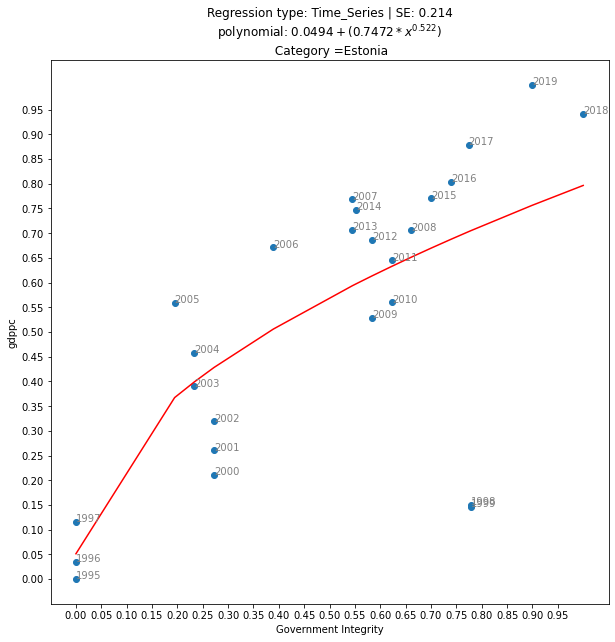

INFO - -----------Category:Eswatini------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.308
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.372
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.308
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.372
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.369
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.368
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.373
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.373
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.372
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.387
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.384
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.371
INFO

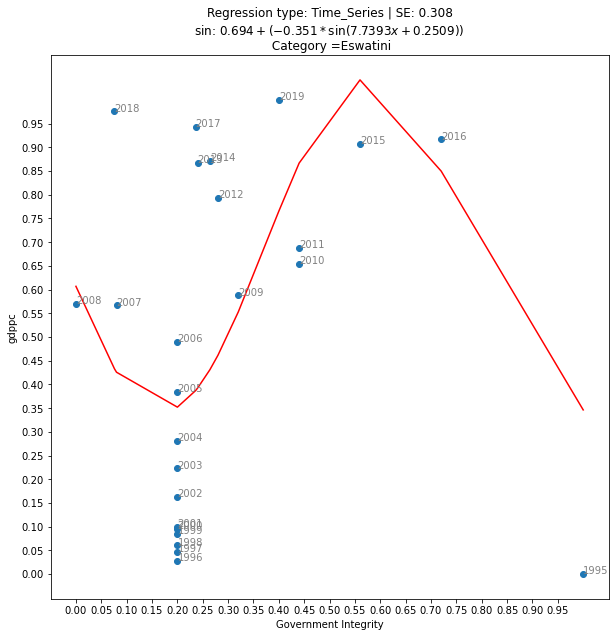

INFO - -----------Category:Ethiopia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.287
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.298
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.287
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.278
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.224
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.318
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.34
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.34
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.279
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.292
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.3
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.276
INFO - *

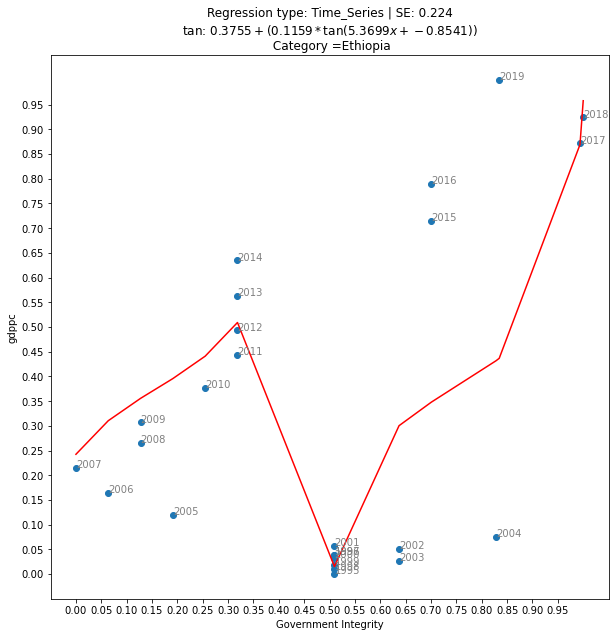

INFO - ---------Category:Faroe Islands---------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -------------Category:Fiji--------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.29
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.299
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.29
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.287
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.201
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.303
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.307
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.307
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.303
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> in

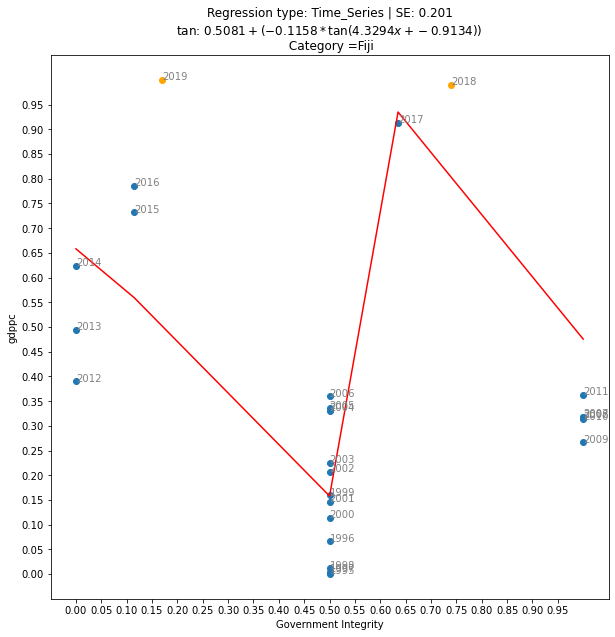

INFO - ------------Category:Finland------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.3
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.294
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.3
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.294
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.284
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.291
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.289
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.289
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.294
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.309
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.309
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.289
INFO - *

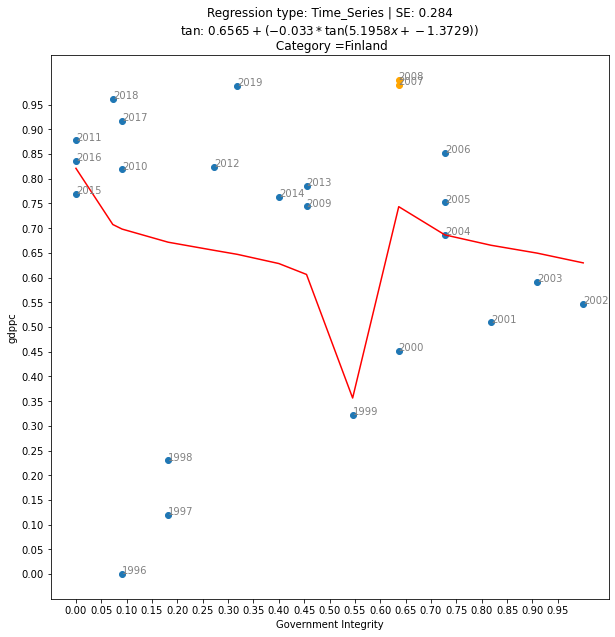

INFO - ------------Category:France-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.227
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.238
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.227
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.248
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.223
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.22
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.279
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.279
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.238
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.231
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.228
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.22
INFO -

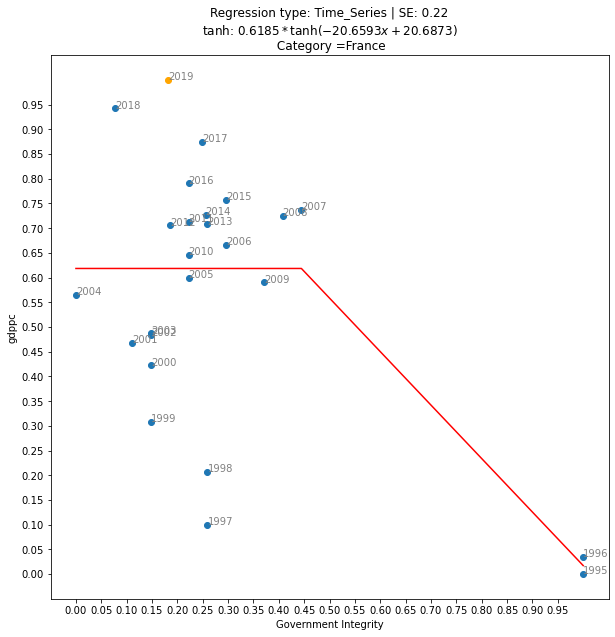

INFO - -------Category:French Polynesia--------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - -------------Category:Gabon-------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.171
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.174
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.171
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.168
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.172
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.183
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.265
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.265
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.183
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.177


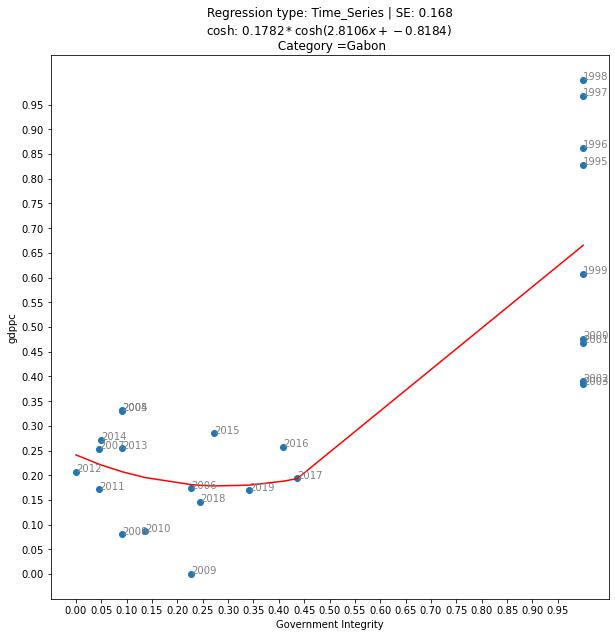

INFO - ----------Category:Gambia, The----------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.
INFO - ------------Category:Georgia------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.094
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.099
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.094
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.143
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.252
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.094
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.223
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.223
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.099
INFO - ******************exp*******************
ERROR - <class 'RuntimeError'> 

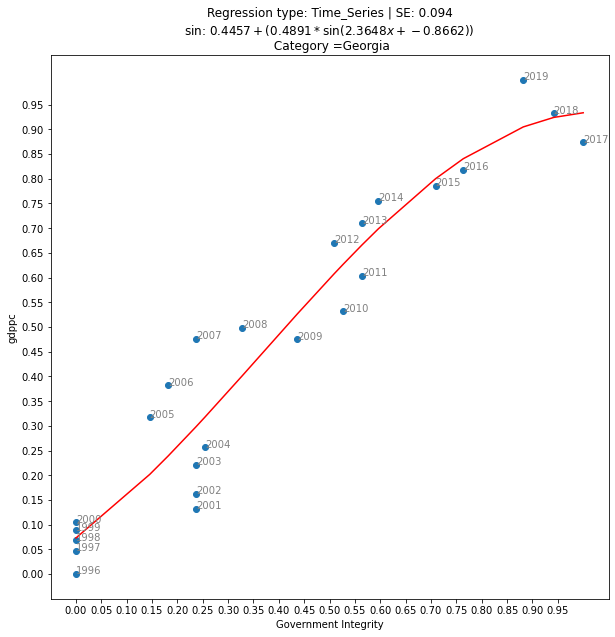

INFO - ------------Category:Germany------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.274
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.306
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.274
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.314
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.32
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.29
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.331
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.331
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.306
INFO - ******************exp*******************


KeyboardInterrupt: 

In [45]:
# Byt default, plot_only_best is True, so, for each time, it will only plot best fitted regression.
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.time_series(standardization=True,
                                                                 drop_outliers=True,
                                                                 plot=True,
                                                                 show_outliers=True,
                                                                 plot_predicted_outliers=True,
                                                                 show_time_label=True)

# Cross-sectional Regression
## list of arguments and their default values
    max_epochs: int = 8000,
    alpha: float = 0.05,
    standardization: bool = True,
    drop_outliers: bool = False,
    outlier_method: str = CST.Beta_Method,
    plot: bool = False,
    plot_only_best: bool = True,
    show_category_label: bool = False,
    show_outliers: bool = False,
    plot_predicted_outliers: bool = False
## Structure of returned dictionaries
Opt_Forms_Dict[independent var] => dictionary[time] => summary object of the optimal equation format
All_Forms_Dict[independent var] => dictionary[time] => dictionary[equation forms] => summary object
All_Forms_Dict[independent var] => dictionary[time]=> dictionary[equation forms] => error if there is any.

INFO - Finding outliers for a Cross_Sectional analysis, Method:beta
WARNING - It is highly recommended to drop outliers by an expert of the field.
INFO - variable gdppc started.
ERROR - All rows are null/zero value and dropped for variable = gdppc, category = ALL and time = 2020.
INFO - variable gdppc done.
INFO - variable Government Integrity started.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1960.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1961.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1962.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1963.
ERROR - All rows are null/zero value and dropped for variable = Government Integrity, category = ALL and time = 1964.
ERROR - All rows are null/zero value and dropped for va

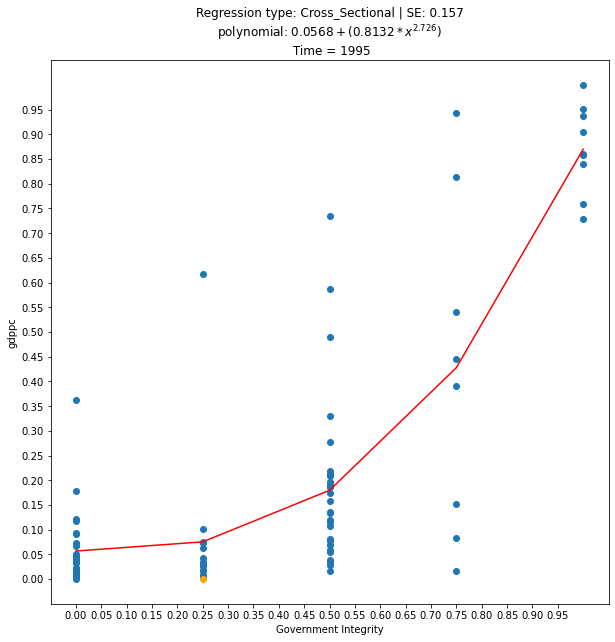

INFO - ---------------Time:1996----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.121
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.117
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.121
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.116
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.211
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.148
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.205
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.205
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.148
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.117
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.195
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.117
INFO

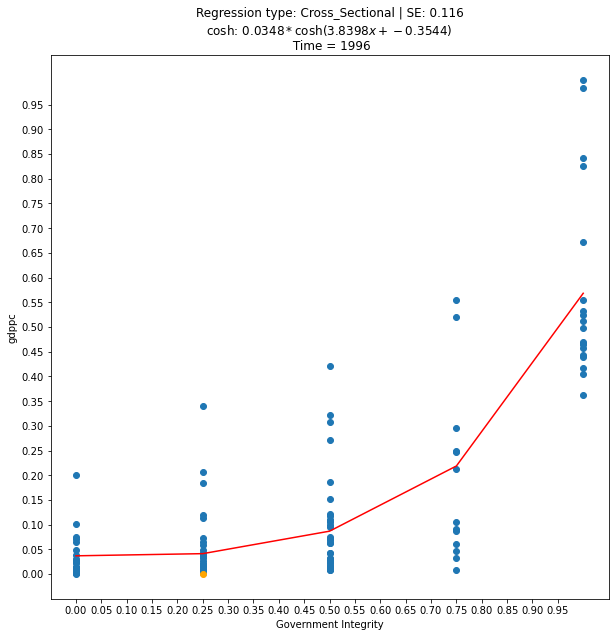

INFO - ---------------Time:1997----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.122
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.124
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.122
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.124
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.201
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.142
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.2
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.2
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.142
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.124
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.217
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.122
INFO - *

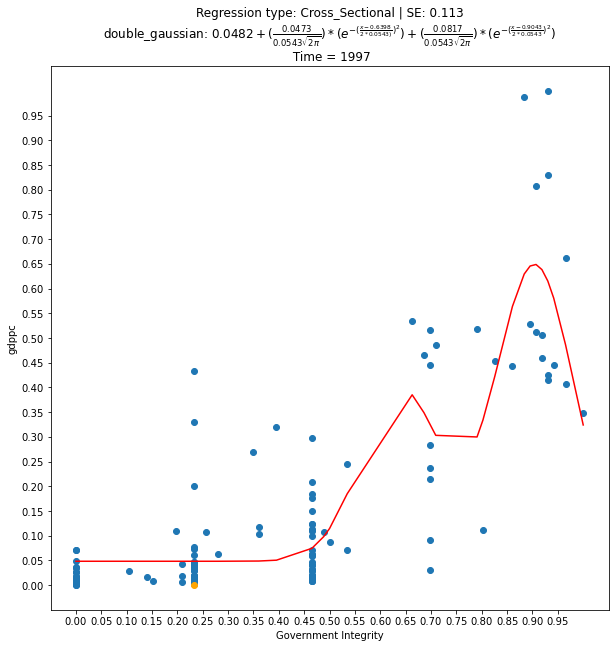

INFO - ---------------Time:1998----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.106
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.106
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.206
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.13
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.183
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.183
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.13
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.107
INFO - ****************logistic****************
ERROR - RuntimeError in function logistic 
 Optimal parameters not found: Number of calls to function has reached ma

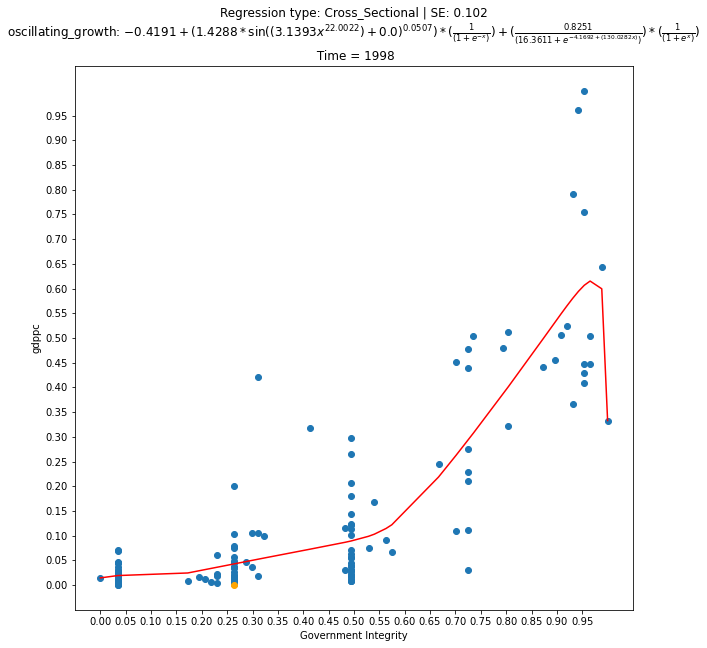

INFO - ---------------Time:1999----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.102
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.105
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.102
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.106
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.188
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.123
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.182
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.182
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.123
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.105
INFO - ****************logistic****************
ERROR - RuntimeError in function logistic 
 Optimal parameters not found: Number of calls to function has reached 

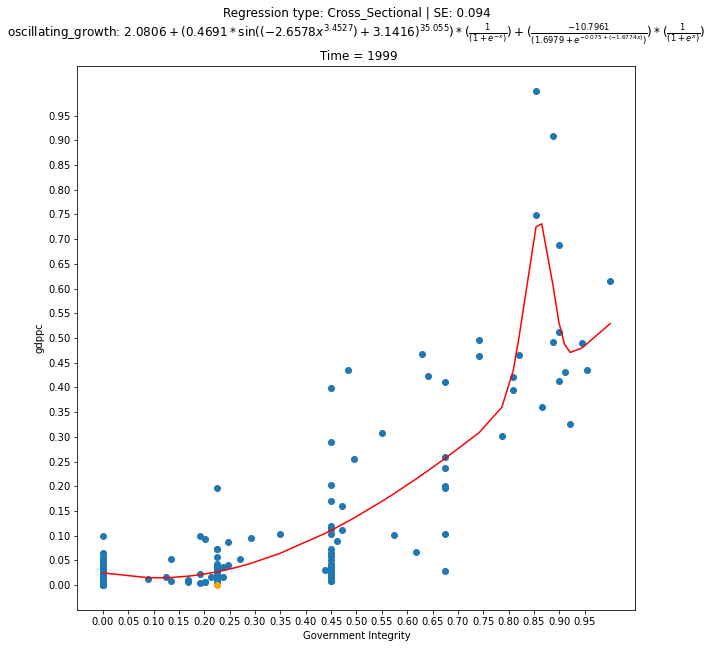

INFO - ---------------Time:2000----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.104
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.105
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.189
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.118
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.182
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.182
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.103
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model SE: 

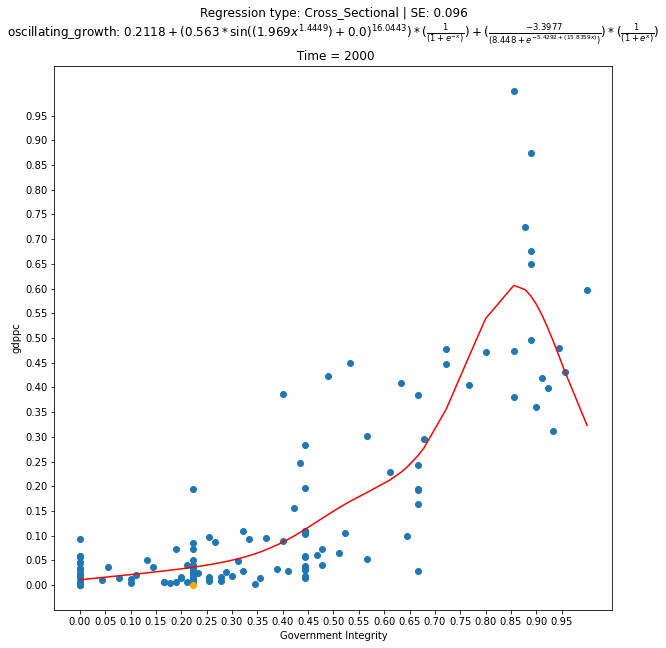

INFO - ---------------Time:2001----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.104
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.109
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.104
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.111
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.192
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.119
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.185
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.185
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.107
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model 

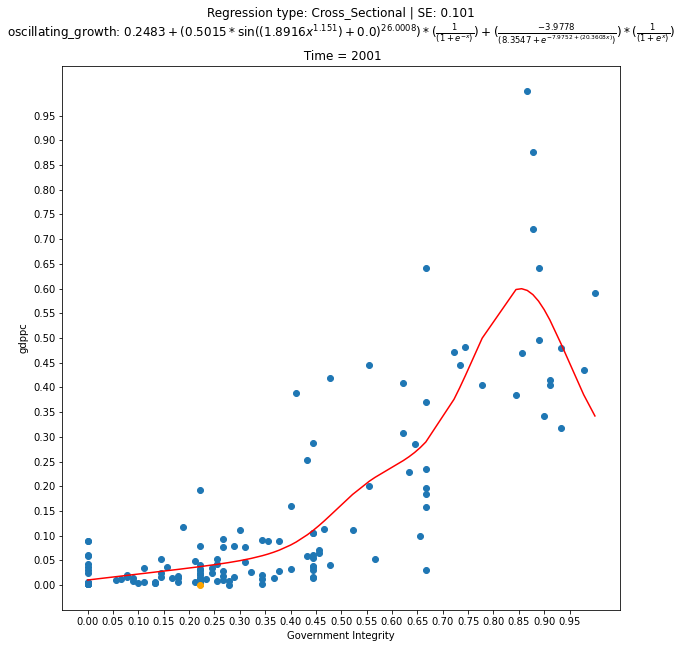

INFO - ---------------Time:2002----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.098
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.105
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.098
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.186
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.115
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.181
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.181
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.103
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model 

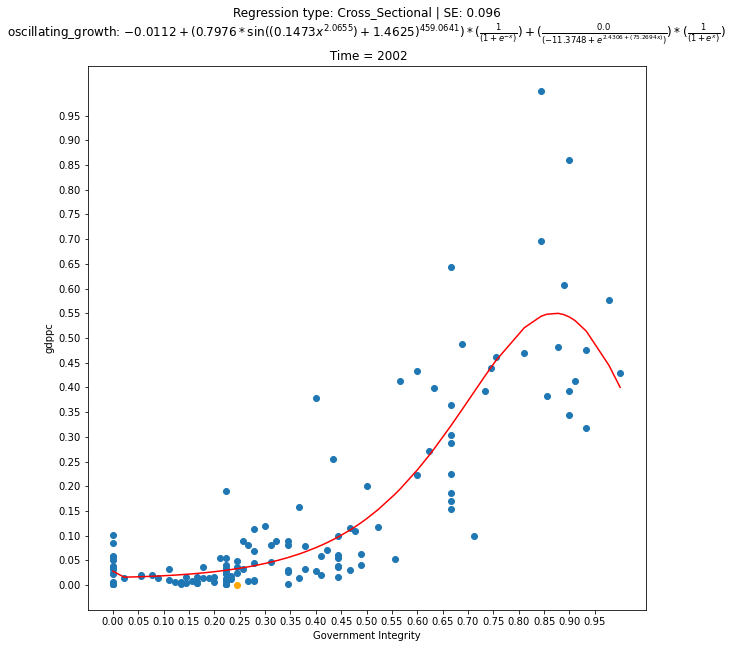

INFO - ---------------Time:2003----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.103
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.105
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.188
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.112
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.181
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.181
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.101
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model 

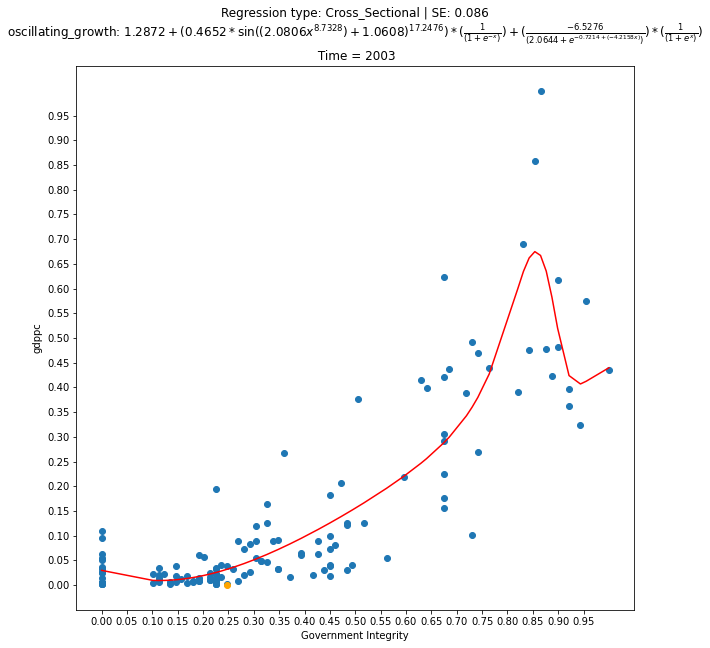

INFO - ---------------Time:2004----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.099
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.099
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.11
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.192
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.113
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.184
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.184
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.105
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model S

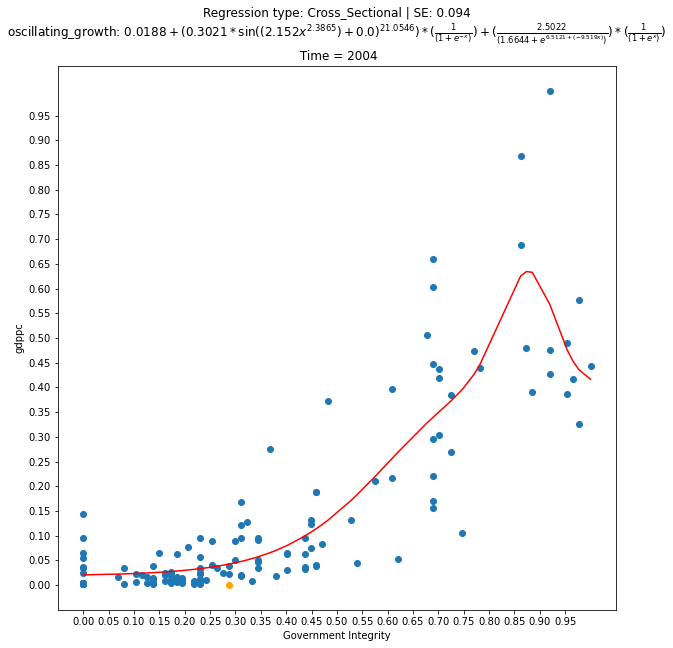

INFO - ---------------Time:2005----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.101
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.101
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.112
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.192
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.11
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.183
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.183
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.106
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model S

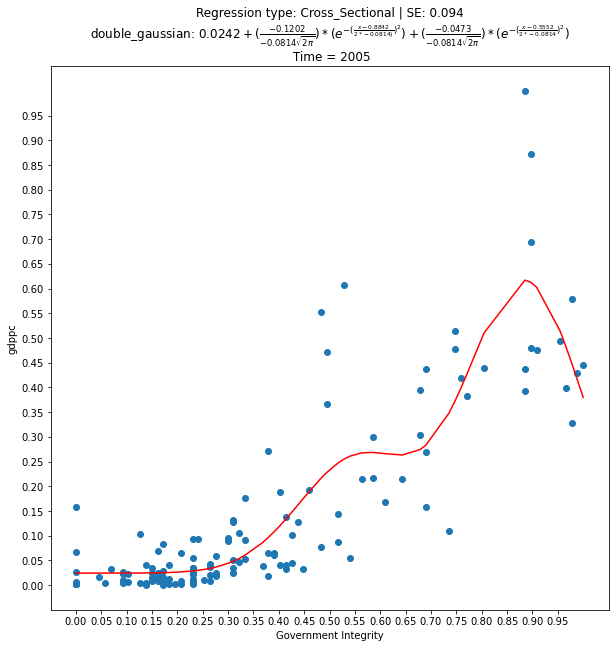

INFO - ---------------Time:2006----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.104
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.104
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.112
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.19
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.109
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.18
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.18
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.106
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model SE:

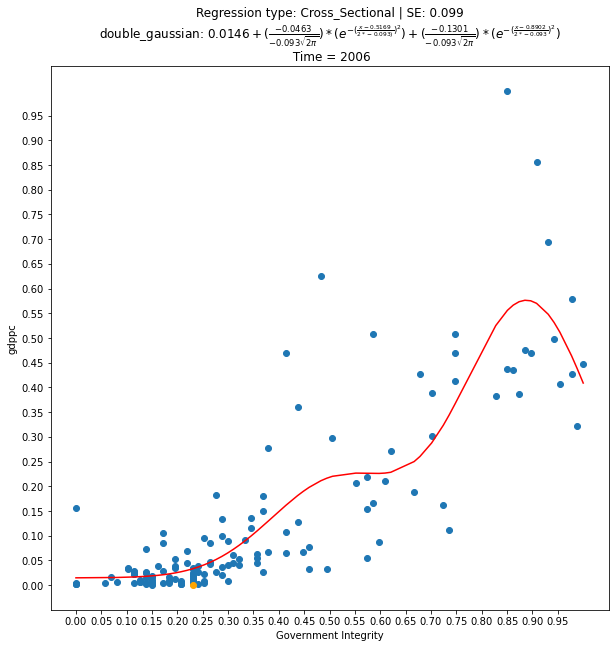

INFO - ---------------Time:2007----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.096
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.098
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.096
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.104
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.182
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.159
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.159
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.097
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.098
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.096
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.097
INFO -

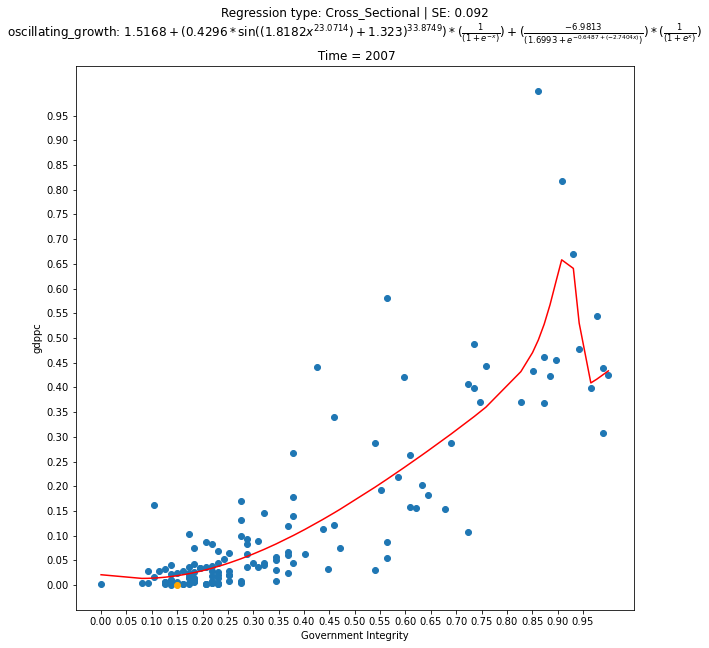

INFO - ---------------Time:2008----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.097
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.104
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.182
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.099
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.161
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.161
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.097
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.098
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.096
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.096
INFO

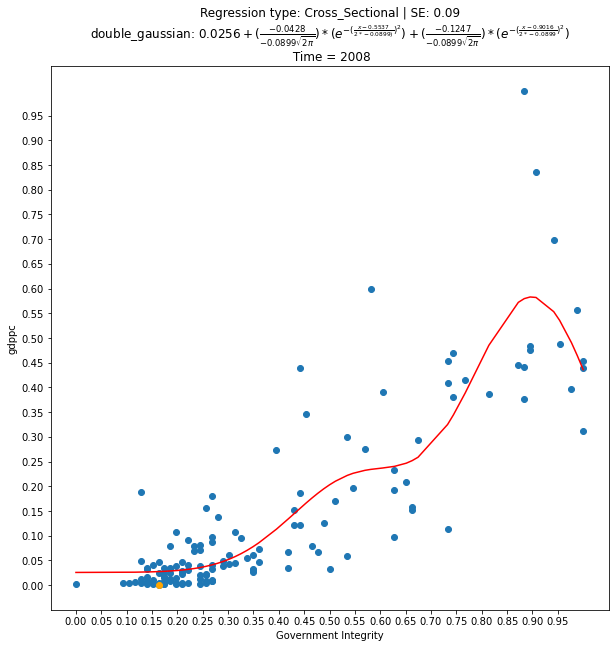

INFO - ---------------Time:2009----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.093
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.097
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.093
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.102
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.177
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.154
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.154
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.096
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.096
INFO - ****************logistic****************
ERROR - RuntimeError in function logistic 
 Optimal parameters not found: Number of calls to function has reached ma

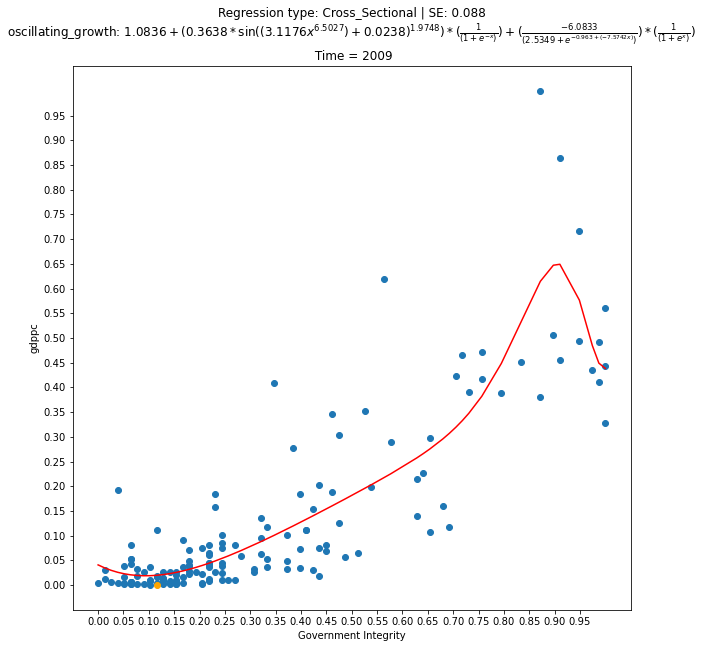

INFO - ---------------Time:2010----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.092
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.096
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.092
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.179
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.101
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.154
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.154
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.095
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model SE

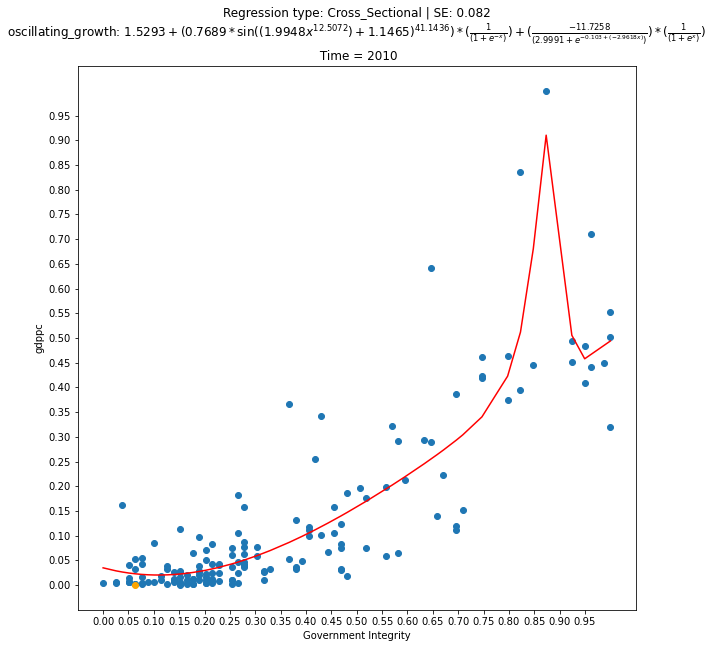

INFO - ---------------Time:2011----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.093
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.096
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.181
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.098
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.153
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.153
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.098
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.092
INFO - ****************logistic****************
ERROR - RuntimeError in function logistic 
 Optimal parameters not found: Number of calls to function has reached ma

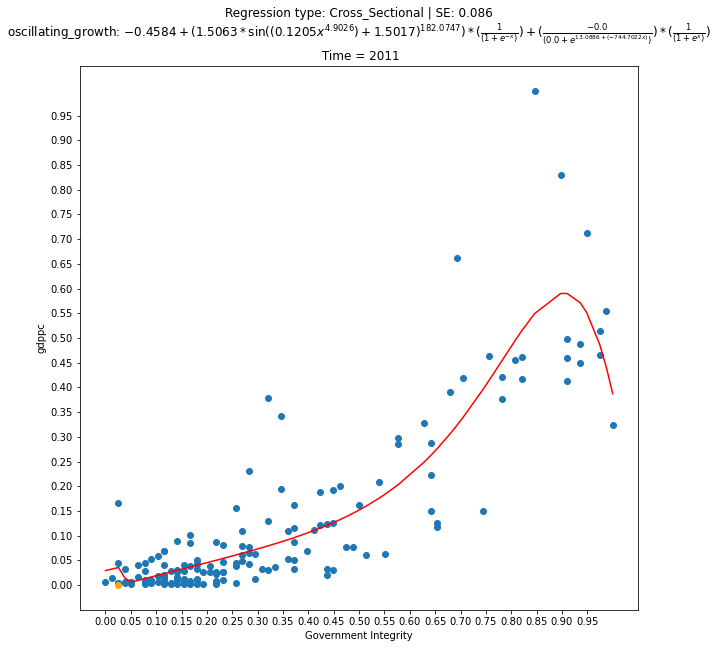

INFO - ---------------Time:2012----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.091
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.093
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.091
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.097
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.186
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.164
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.164
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.1
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.093
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.23
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.092
INFO - **

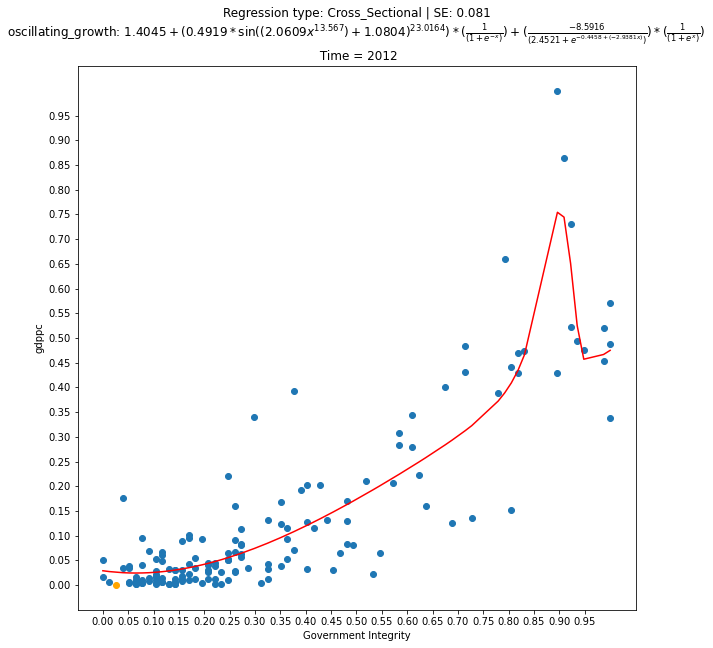

INFO - ---------------Time:2013----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.092
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.095
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.174
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.098
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.166
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.166
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.091
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model SE

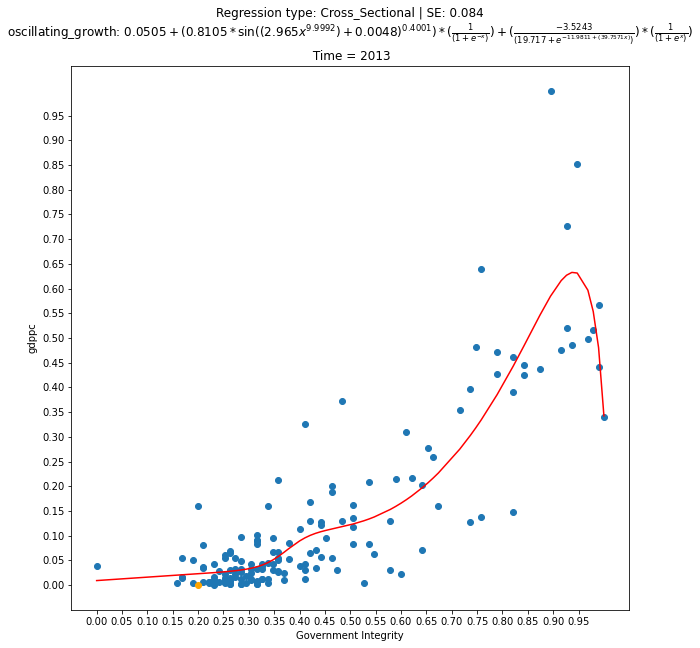

INFO - ---------------Time:2014----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.093
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.09
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.095
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.18
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.16
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.16
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.092
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.2

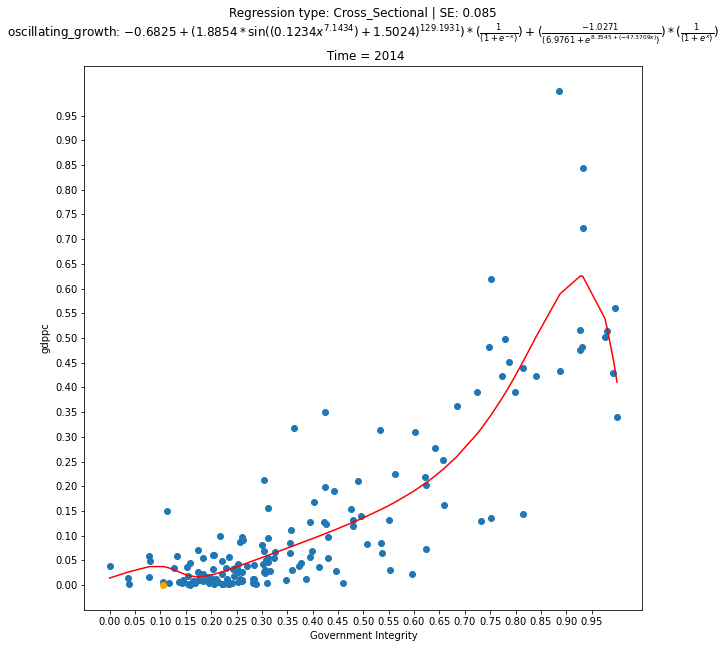

INFO - ---------------Time:2015----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.098
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.095
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.1
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.182
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.109
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.166
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.166
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.097
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.098
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.094
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.096
INFO -

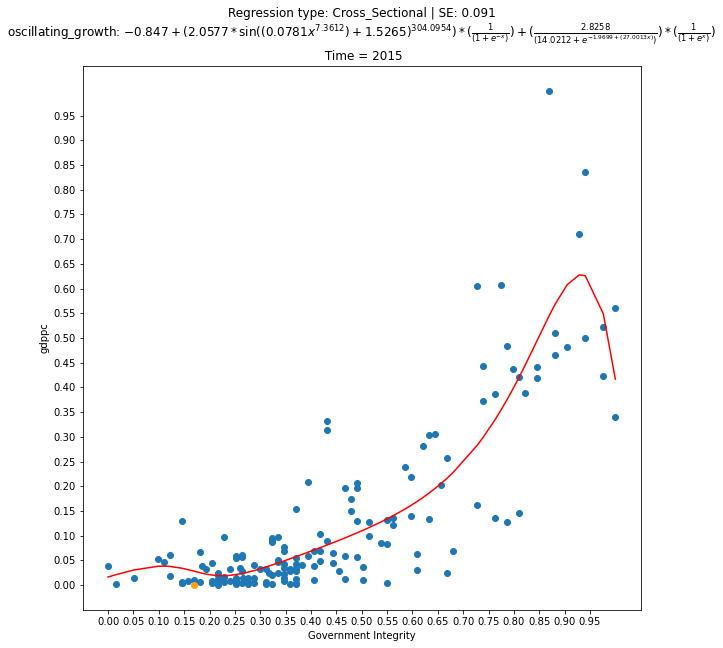

INFO - ---------------Time:2016----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.092
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.095
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.092
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.096
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.18
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.164
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.164
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.107
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.094
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.091
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.092
INFO 

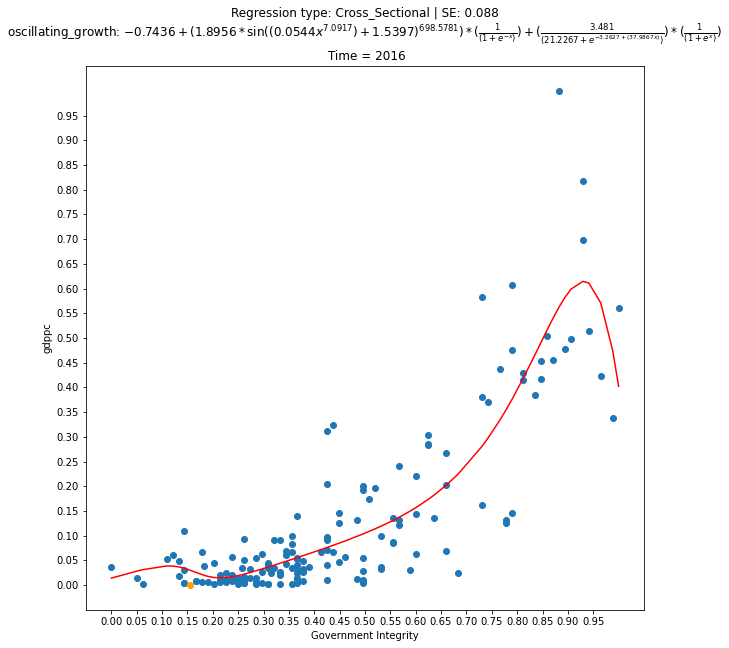

INFO - ---------------Time:2017----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.102
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.104
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.184
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.108
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.166
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.166
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.101
INFO - ******************exp*******************
INFO - Fitted. Model SE: 0.102
INFO - ****************logistic****************
INFO - Fitted. Model SE: 0.1
INFO - ***************polynomial***************
INFO - Fitted. Model SE: 0.1
INFO - *****

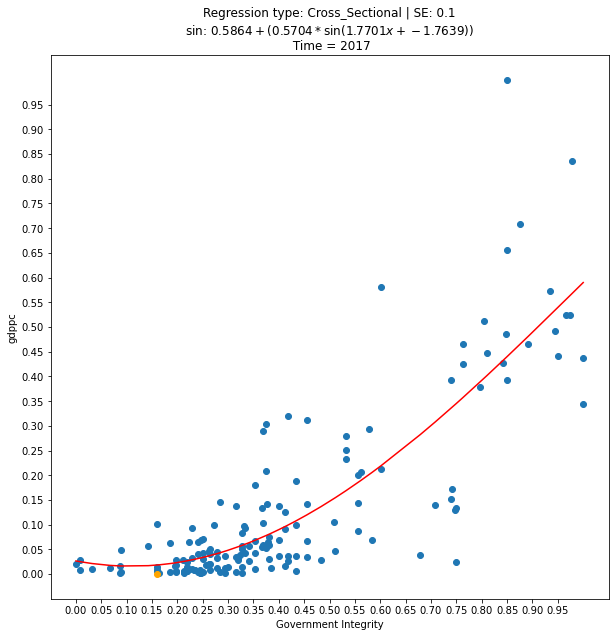

INFO - ---------------Time:2018----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.102
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.1
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.106
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.181
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.107
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.162
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.162
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.101
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
ERROR - RuntimeError in f

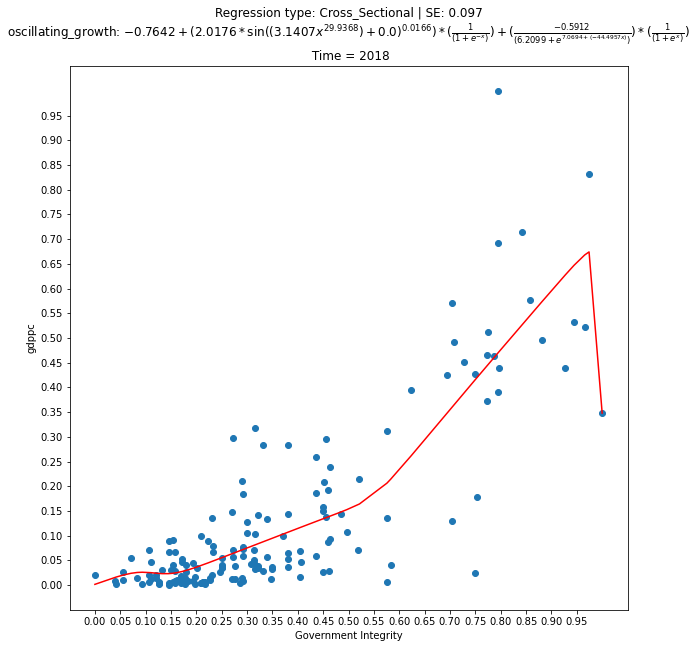

INFO - ---------------Time:2019----------------
INFO - ******************sin*******************
INFO - Fitted. Model SE: 0.093
INFO - ******************sinh******************
INFO - Fitted. Model SE: 0.095
INFO - ******************cos*******************
INFO - Fitted. Model SE: 0.093
INFO - ******************cosh******************
INFO - Fitted. Model SE: 0.098
INFO - ******************tan*******************
INFO - Fitted. Model SE: 0.186
INFO - ******************tanh******************
INFO - Fitted. Model SE: 0.102
INFO - ******************lnx*******************
INFO - Fitted. Model SE: 0.163
INFO - ******************logx******************
INFO - Fitted. Model SE: 0.163
INFO - ***************euler_exp****************
INFO - Fitted. Model SE: 0.094
INFO - ******************exp*******************
ERROR - RuntimeError in function exp 
 Optimal parameters not found: Number of calls to function has reached maxfev = 8000.
INFO - ****************logistic****************
INFO - Fitted. Model 

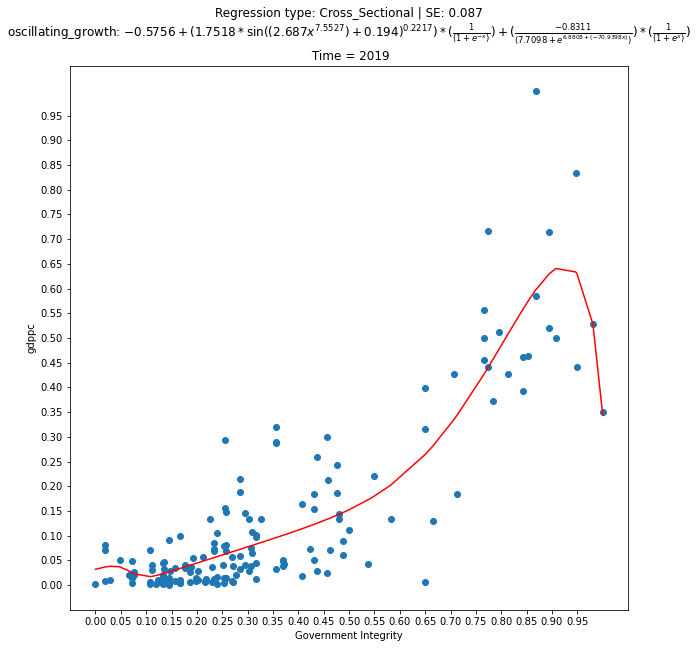

INFO - ---------------Time:2020----------------
ERROR - All rows are null value and dropped.
ERROR - Analysis error: The number of observations are less than 10.


In [46]:
Opt_Forms_Dict  ,All_Forms_Dict ,  Error_Terms = cpt.cross_sectional(standardization=True,
                                                                     drop_outliers=True,
                                                                     plot=True,
                                                                     show_outliers=True,
                                                                     plot_predicted_outliers=True)

# Summary object Report and helps

In [47]:
All_Forms_Dict

{'Government Integrity': {'1995': {'sin': <summary.Summary at 0x1ee733f2ac0>,
   'sinh': <summary.Summary at 0x1ee755d0190>,
   'cos': <summary.Summary at 0x1ee747d9cd0>,
   'cosh': <summary.Summary at 0x1ee74c26fd0>,
   'tan': <summary.Summary at 0x1ee74ba7d30>,
   'tanh': <summary.Summary at 0x1ee754b8df0>,
   'lnx': <summary.Summary at 0x1ee72e67790>,
   'logx': <summary.Summary at 0x1ee754cce50>,
   'euler_exp': <summary.Summary at 0x1ee754db8b0>,
   'logistic': <summary.Summary at 0x1ee754d3ac0>,
   'polynomial': <summary.Summary at 0x1ee754d35e0>,
   'oscillating_growth': <summary.Summary at 0x1ee754d3d30>,
   'double_gaussian': <summary.Summary at 0x1ee754e9160>},
  '1996': {'sin': <summary.Summary at 0x1ee759f3bb0>,
   'sinh': <summary.Summary at 0x1ee75c46c70>,
   'cos': <summary.Summary at 0x1ee732d20d0>,
   'cosh': <summary.Summary at 0x1ee759ff4f0>,
   'tan': <summary.Summary at 0x1ee75a070d0>,
   'tanh': <summary.Summary at 0x1ee75a07dc0>,
   'lnx': <summary.Summary at 0x1

In [50]:
GI_1995_sinh = All_Forms_Dict['Government Integrity']['1995']['sinh']

In [51]:
GI_1995_sinh.help()

report() Prints full report of the results.
report(list of keys) Prints report of the regression for the given list of items
summary_items Prints a list of items inside the summary object that can be called via report(list of keys) or directlyby summary_object.item_name like summary_object.Independent_Var
save(file name) This function adds a pickle to the end of the name and saves thefile. To load the file you can use pickle package.
plot(args) will plot the X, Y and fitted line(predicted Ys) on a scatter plot.


In [55]:
GI_1995_sinh.summary_items()

Data : Processed data including estimated values                                
Reg_Type : Regression Type                                                      
Independent_Var : Name of Independent Variable                                  
Dependent_Var : Name of Dependent variable                                      
Time_col_name : The time column name in the dataset.                            
Cat_col_name : The category column name in the dataset.                         
Cross_section_time : Time related to the cross_sectional data                   
Time_series_category : Category of related Time_series                          
Func : Function name                                                            
Equation_String : Text-based equation form                                      
Equation_Latex : Latex-based equation form                                      
Coefficients : Coefficients of parameters                                       
Covariance_Coefficients : co

In [52]:
GI_1995_sinh.report()

################################################################################
                               Regression Summary                               
Data Type:            Cross_Sectional      Equation:                        sinh
Dep.Var                         gdppc      Independent.Var: Government Integrity
Time:                             ALL      Categories:                       ALL
Observations:                      89      Deg.Freedom:                       86
Standardized:                    True      Significance Level:              0.05
Note 1: Copatrec aims to analyze complex behaviors. Complex functions can genera
te their unique curve or create a snapshot of a specific range. Thus, it would b
e beneficial to compare the curve with the already known complex behaviors. For 
example, the logistic function is representative of S-shaped behavior. However, 
all other tasks like oscillator or sine can generate S-shape behavior in a speci
fic range. So, while the equ

# Plotting results in the summary object

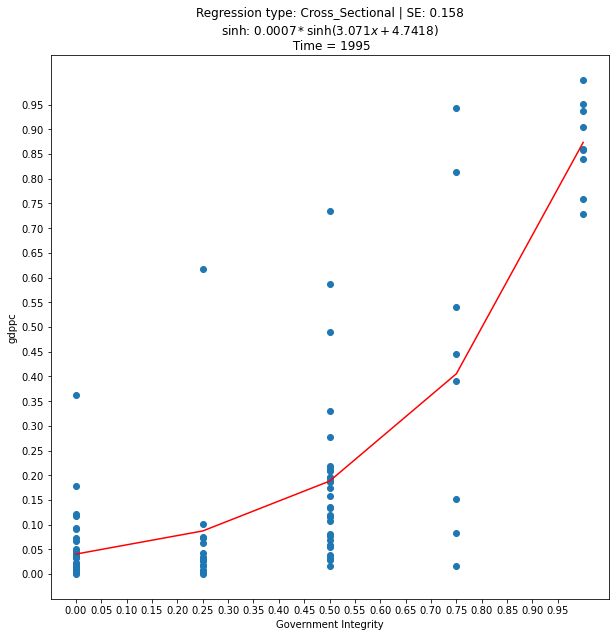

In [53]:
GI_1995_sinh.plot()

# Saving a summary object

In [54]:
GI_1995_sinh.save("Governement_integrity_1995_sinh")

# Loading a summary object

In [ ]:
file = open('Governement_integrity_1995_sinh.pickle', 'rb')
summ = pickle.load(file)
summ.report()